In [1]:
import os
import math
import time

import numpy as np
from matplotlib import pyplot as plt

import keras
from keras import layers
from keras import regularizers
from keras import backend as K

import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
Root_dir = "../"

In [3]:
# 실 테스트 데이터 로드
dir_seperator = Root_dir + "/Data/csv_future/"
#dir_seperator = "../Data/csv_trains/"
dir_seperator = "../Data/csv_test_total/"
csv_list = sorted(os.listdir(dir_seperator))
csv_tests = []
idx_tests = {}
for csv_dir in csv_list:
    name = csv_dir.split("_")[0]
    print(name + ", ", end='')
    idx_tests[name] = len(csv_tests)
    csv_tests.append(np.load(dir_seperator + csv_dir)[:,1:5])
    print(csv_tests[-1].shape)

ADA, (474337, 4)
AION, (474337, 4)
ALGO, (474337, 4)
ANKR, (474337, 4)
ARPA, (474337, 4)
ATOM, (474337, 4)
BAND, (474337, 4)
BAT, (474337, 4)
BCH, (474337, 4)
BEAM, (474337, 4)
BNB, (474337, 4)
BNT, (474337, 4)
BTC, (474338, 4)
BTS, (474338, 4)
BTT, (474337, 4)
CELR, (474337, 4)
CHZ, (474337, 4)
COCOS, (468577, 4)
COS, (474337, 4)
COTI, (474337, 4)
CTXC, (474337, 4)
CVC, (474338, 4)
DASH, (474337, 4)
DATA, (474337, 4)
DENT, (474337, 4)
DOCK, (474337, 4)
DOGE, (474337, 4)
DREP, (468577, 4)
ENJ, (474337, 4)
EOS, (474337, 4)
ETC, (474337, 4)
ETH, (474337, 4)
FET, (474337, 4)
FTM, (474337, 4)
FTT, (474337, 4)
FUN, (474337, 4)
HBAR, (474337, 4)
HOT, (474338, 4)
ICX, (474337, 4)
IOST, (474337, 4)
IOTA, (474337, 4)
IOTX, (474337, 4)
KAVA, (474337, 4)
KEY, (474337, 4)
LINK, (474337, 4)
LSK, (474338, 4)
LTC, (474338, 4)
MATIC, (474337, 4)
MITH, (474337, 4)
MTL, (474337, 4)
NANO, (474337, 4)
NEO, (474337, 4)
NKN, (474337, 4)
NULS, (474337, 4)
OGN, (474337, 4)
OMG, (474337, 4)
ONE, (474337, 4)
ON

In [4]:
# Coin train_total 데이터
dir_seperator = Root_dir + "/Data/csv_train_total/"
csv_list = sorted(os.listdir(dir_seperator))
csv_trains = []
idx_trains = {}
for csv_dir in csv_list:
    name = csv_dir.split("_")[0]
    print(name + ", ", end='')
    idx_trains[name] = len(csv_trains)
    csv_trains.append(np.load(dir_seperator + csv_dir)[:,1:5])
    print(csv_trains[-1].shape)

ADA, (1337801, 4)
AION, (371999, 4)
ALGO, (720216, 4)
ANKR, (674736, 4)
ARPA, (522576, 4)
ATOM, (797075, 4)
BAND, (593256, 4)
BAT, (876995, 4)
BCH, (491399, 4)
BEAM, (588936, 4)
BNB, (1568829, 4)
BNT, (390599, 4)
BTC, (1685043, 4)
BTS, (390599, 4)
BTT, (923075, 4)
CELR, (847475, 4)
CHZ, (611016, 4)
COCOS, (633636, 4)
COS, (659136, 4)
COTI, (361973, 4)
CTXC, (499679, 4)
CVC, (625416, 4)
DASH, (843155, 4)
DATA, (303121, 4)
DENT, (625416, 4)
DOCK, (625416, 4)
DOGE, (700776, 4)
DREP, (420599, 4)
ENJ, (812915, 4)
EOS, (1278703, 4)
ETC, (1257853, 4)
ETH, (1685043, 4)
FET, (882755, 4)
FTM, (735816, 4)
FTT, (460139, 4)
FUN, (625416, 4)
HBAR, (577896, 4)
HOT, (897155, 4)
ICX, (1256082, 4)
IOST, (851787, 4)
IOTA, (1274113, 4)
IOTX, (511859, 4)
KAVA, (540576, 4)
KEY, (625416, 4)
LINK, (944675, 4)
LSK, (390599, 4)
LTC, (1515569, 4)
MATIC, (800735, 4)
MITH, (811115, 4)
MTL, (630816, 4)
NANO, (834515, 4)
NEO, (1548680, 4)
NKN, (560016, 4)
NULS, (1199283, 4)
OGN, (431339, 4)
OMG, (834515, 4)
ONE, (75

In [ ]:
# 파일 이름으로 데이터 로드 + train 데이터
dir_seperator = Root_dir + "/Data/stock_trains/"
csv_list = sorted(os.listdir(dir_seperator))
train_idx = -1
csv_trains = []
for csv_dir in csv_list:
    print(csv_dir + ", ", end='')
    if train_idx == -1 and "AAPL" in csv_dir:
        train_idx = len(csv_trains)
    csv_trains.append(np.load(dir_seperator + csv_dir)[:,1:5])
    print(csv_trains[-1].shape)
print("AAPL: " + str(train_idx))

In [ ]:
# 파일 이름으로 데이터 로드 + csv_trains 추가
dir_seperator = Root_dir + "/Data/csv_trains/"
csv_list = sorted(os.listdir(dir_seperator))
train_idx = -1
for csv_dir in csv_list:
    print(csv_dir + ", ", end='')
    if train_idx == -1 and "BTC" in csv_dir:
        train_idx = len(csv_trains)
    csv_trains.append(np.load(dir_seperator + csv_dir)[:,1:5])
    print(csv_trains[-1].shape)
print("BTC: " + str(train_idx))

In [ ]:
# 파일 이름으로 데이터 로드 + test 데이터
dir_seperator = Root_dir + "/Data/stock_tests/"
csv_list = sorted(os.listdir(dir_seperator))
test_idx = -1
csv_tests = []
for csv_dir in csv_list:
    print(csv_dir + ", ", end='')
    if test_idx == -1 and "AAPL" in csv_dir:
        test_idx = len(csv_tests)
    csv_tests.append(np.load(dir_seperator + csv_dir)[:,1:5])
    print(csv_tests[-1].shape)
print("AAPL: " + str(test_idx))

In [ ]:
# 파일 이름으로 데이터 로드 + BTC_tests 추가
dir_seperator = Root_dir + "/Data/csv_tests/"
csv_list = sorted(os.listdir(dir_seperator))
test_idx = -1
for csv_dir in csv_list:
    print(csv_dir + ", ", end='')
    if test_idx == -1 and "BTC" in csv_dir:
        test_idx = len(csv_tests)
    csv_tests.append(np.load(dir_seperator + csv_dir)[:,1:5])
    print(csv_tests[-1].shape)
print("BTC: " + str(test_idx))

In [ ]:
# 주식 데이터 합산 (주식 데이터만 테스트하는 용)
dir_seperator = Root_dir + "/Data/stock_trains/"
csv_list = sorted(os.listdir(dir_seperator))
temp1 = csv_list
test_idx = -1
csv_tests = []
for csv_dir in csv_list:
    print(csv_dir + ", ", end='')
    if test_idx == -1 and "AAPL" in csv_dir:
        test_idx = len(csv_tests)
    csv_tests.append(np.load(dir_seperator + csv_dir)[:,1:5])
    print(csv_tests[-1].shape)
print("AAPL: " + str(test_idx))

dir_seperator = "/data/stock_tests/"
csv_list = sorted(os.listdir(dir_seperator))
temp2 = csv_list
append_idx = 0
for csv_dir in csv_list:
    print(csv_dir + ", ", end='')
    csv_tests[append_idx] = np.append(csv_tests[append_idx], np.load(dir_seperator + csv_dir)[:,1:5], axis=0)
    print(csv_tests[append_idx].shape)
    append_idx += 1
print("AAPL: " + str(test_idx))

In [5]:
init = 'he_normal'
l1reg = regularizers.l1(1e-2)
l2reg = regularizers.l2(1e-5)
l1_l2reg = regularizers.l1_l2(l1=1e-2, l2=1e-2)


def sign_acc(y_true, y_pred):
    return tf.math.floor(K.clip(y_true * y_pred, -0.5, 0.5)) + 1

In [5]:
# Inception
def pred_model():
    input = keras.Input(shape=X_shape)

    mul = 32

    i1 = layers.Conv1D(mul*2, kernel_size=1, strides=2, activation=None, padding='same', kernel_initializer=init)(input)
    i1 = layers.BatchNormalization()(i1)
    i1 = layers.Activation('relu')(i1)

    i2 = layers.Conv1D(mul*1, kernel_size=1, strides=1, activation=None, padding='same', kernel_initializer=init)(input)
    i2 = layers.BatchNormalization()(i2)
    i2 = layers.Activation('relu')(i2)
    i2 = layers.Conv1D(mul*2, kernel_size=3, strides=2, activation=None, padding='same', kernel_initializer=init)(i2)
    i2 = layers.BatchNormalization()(i2)
    i2 = layers.Activation('relu')(i2)

    i3 = layers.AveragePooling1D(pool_size=3, strides=2, padding='same')(input)
    i3 = layers.Conv1D(mul*2, kernel_size=3, strides=1, activation=None, padding='same', kernel_initializer=init)(i3)
    i3 = layers.BatchNormalization()(i3)
    i3 = layers.Activation('relu')(i3)

    i4 = layers.Conv1D(mul*1, kernel_size=1, strides=1, activation=None, padding='same', kernel_initializer=init)(input)
    i4 = layers.BatchNormalization()(i4)
    i4 = layers.Activation('relu')(i4)
    i4 = layers.Conv1D(mul*1, kernel_size=3, strides=1, activation=None, padding='same', kernel_initializer=init)(i4)
    i4 = layers.BatchNormalization()(i4)
    i4 = layers.Activation('relu')(i4)
    i4 = layers.Conv1D(mul*2, kernel_size=3, strides=2, activation=None, padding='same', kernel_initializer=init)(i4)
    i4 = layers.BatchNormalization()(i4)
    i4 = layers.Activation('relu')(i4)

    x = layers.Concatenate()([i1, i2, i3, i4])

    x = layers.Flatten()(x)

    x = layers.Dense(1, activation='linear', kernel_initializer=init)(x)

    predictor = keras.models.Model(input, x)

    return predictor

In [6]:
# Conditional Inception
def pred_model():
    input = keras.Input(shape=X_shape)
    label = keras.Input(shape=(1,))

    mul = 32
    i1 = layers.Conv1D(mul*2, kernel_size=1, strides=2, activation=None, padding='same', kernel_initializer=init)(input)
    i1 = layers.BatchNormalization()(i1)
    i1 = layers.Activation('relu')(i1)

    i2 = layers.Conv1D(mul*1, kernel_size=1, strides=1, activation=None, padding='same', kernel_initializer=init)(input)
    i2 = layers.BatchNormalization()(i2)
    i2 = layers.Activation('relu')(i2)
    i2 = layers.Conv1D(mul*2, kernel_size=3, strides=2, activation=None, padding='same', kernel_initializer=init)(i2)
    i2 = layers.BatchNormalization()(i2)
    i2 = layers.Activation('relu')(i2)

    i3 = layers.AveragePooling1D(pool_size=3, strides=2, padding='same')(input)
    i3 = layers.Conv1D(mul*2, kernel_size=3, strides=1, activation=None, padding='same', kernel_initializer=init)(i3)
    i3 = layers.BatchNormalization()(i3)
    i3 = layers.Activation('relu')(i3)

    i4 = layers.Conv1D(mul*1, kernel_size=1, strides=1, activation=None, padding='same', kernel_initializer=init)(input)
    i4 = layers.BatchNormalization()(i4)
    i4 = layers.Activation('relu')(i4)
    i4 = layers.Conv1D(mul*1, kernel_size=3, strides=1, activation=None, padding='same', kernel_initializer=init)(i4)
    i4 = layers.BatchNormalization()(i4)
    i4 = layers.Activation('relu')(i4)
    i4 = layers.Conv1D(mul*2, kernel_size=3, strides=2, activation=None, padding='same', kernel_initializer=init)(i4)
    i4 = layers.BatchNormalization()(i4)
    i4 = layers.Activation('relu')(i4)

    x = layers.Concatenate()([i1, i2, i3, i4])

    x = layers.Flatten()(x)

    y = layers.Embedding(NUM_TICKER, x.shape[-1], input_length=1)(label)
    y = layers.Flatten()(y)
    x = layers.merge.Multiply()([x, y])

    x = layers.Dense(1, activation='linear', kernel_initializer=init)(x)

    predictor = keras.models.Model([input, label], x)

    return predictor

In [ ]:
# LSTM
def pred_model():
    input = keras.Input(shape=X_shape)
    
    mul = 128
    drop_rate = 0.2

    encoder_last_h1, encoder_last_h2, encoder_last_c = layers.LSTM(mul, dropout=drop_rate, 
        return_sequences=False, return_state=True)(input)
    encoder_last_h1 = layers.BatchNormalization(momentum=0.6)(encoder_last_h1)
    encoder_last_c = layers.BatchNormalization(momentum=0.6)(encoder_last_c)

    decoder = layers.RepeatVector(y_shape[0])(encoder_last_h1)
    decoder = layers.LSTM(mul, dropout=drop_rate, return_sequences=True, 
                          return_state=False)(decoder, initial_state=[encoder_last_h1, encoder_last_c])

    output = layers.TimeDistributed(layers.Dense(y_shape[1]))(decoder)

    predictor = keras.models.Model(input, output)
    predictor.compile(optimizer=model_optimizer, loss='mse', metrics=[sign_acc])

    return predictor

In [24]:
# VGG
def pred_model(vgg_name='VGG19'):
    cfg = {
        'VGG11': [64, 'M', 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
        'VGG13': [64, 64, 'M', 128, 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
        'VGG16': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512, 'M', 512, 512, 512, 'M'],
        'VGG19': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 512, 512, 512, 512, 'M', 512, 512, 512, 512, 'M'],
    }
    input = keras.Input(shape=X_shape)

    x = input
    for dim in cfg[vgg_name]:
        if dim == 'M':
            x = layers.MaxPooling1D(pool_size=2, strides=2, padding='same')(x)
        else:
            for i_layer in range(1):
                x = layers.Conv1D(dim*1, kernel_size=3, strides=1, activation=None, padding='same', kernel_initializer=init)(x)
                x = layers.BatchNormalization()(x)
                x = layers.Activation('relu')(x)
    x = layers.AveragePooling1D(pool_size=1, strides=1, padding='same')(x)
    x = layers.Flatten()(x)
    x = layers.Dense(y_shape[0], activation='linear', kernel_initializer=init)(x)

    predictor = keras.models.Model(input, x)
    return predictor

In [25]:
# ResNet
def residual_block(input, dim):
    r1 = layers.Conv1D(dim, kernel_size=3, strides=1, activation=None, padding='same', kernel_initializer=init)(input)
    r1 = layers.BatchNormalization()(r1)
    r1 = layers.Activation('relu')(r1)
    r1 = layers.Conv1D(dim, kernel_size=3, strides=1, activation=None, padding='same', kernel_initializer=init)(r1)
    r1 = layers.BatchNormalization()(r1)

    r2 = layers.Conv1D(dim, kernel_size=1, strides=1, activation=None, padding='same', kernel_initializer=init)(input)
    r2 = layers.BatchNormalization()(r2)
    x = layers.Add()([r1, r2])
    x = layers.Activation('relu')(x)

    return x

def pred_model(resnet_name='resnet16'):
    cfg = {
        'resnet16': [64, 64, 'M', 128, 128, 'M', 256, 256, 'M', 512, 512, 'M'],
    }
    cfg = cfg[resnet_name]
    new_cfg = []
    for i, dim in enumerate(cfg):
        if dim == 'M':
            new_cfg.append(dim)
        else:
            for j in range(1):
                new_cfg.append(int(dim / 4))
    cfg = new_cfg
    
    input = keras.Input(shape=X_shape)
    x = input
    x = layers.Conv1D(cfg[0], kernel_size=3, strides=1, activation=None, padding='same', kernel_initializer=init)(x)

    for i, dim in enumerate(cfg):
        if dim == 'M':
            x = layers.MaxPooling1D(pool_size=2, strides=2, padding='same')(x)
            if i + 1 < len(cfg):
                x = layers.Conv1D(cfg[i+1], kernel_size=3, strides=1, activation=None, padding='same', kernel_initializer=init)(x)
                x = layers.BatchNormalization()(x)
                x = layers.Activation('relu')(x)
        else:
            x = residual_block(x, dim)
    x = layers.AveragePooling1D(pool_size=1, strides=1, padding='same')(x)
    x = layers.Flatten()(x)
    x = layers.Dense(1024, activation=None, kernel_initializer=init)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Dense(len(y_windows), activation='linear', kernel_initializer=init)(x)

    predictor = keras.models.Model(input, x)
    return predictor

In [ ]:
csv_data = csv_trains[train_idx][:1440,3]
print(csv_data.shape)

csv_index = np.array(range(len(csv_data)))
trend_param = np.polyfit(csv_index, csv_data, 1)
print(trend_param)
csv_trend = csv_index * trend_param[0] + trend_param[1]

csv_detrend = csv_data - csv_trend

plt.clf()
plt.plot(list(range(len(csv_data))),csv_data)
plt.plot(list(range(len(csv_data))),csv_trend)
plt.show()

plt.clf()
plt.plot(list(range(len(csv_data))),csv_detrend)
plt.show()

In [7]:
# X, y 데이터 생성기 + close_value 기준 csv 정규화 + log
def get_Xy(data, ix, X_data, y_data):
    mul_rate = 100
    for i_batch in range(len(ix)):
        idx = ix[i_batch]
        
        if X_data is not None:
            for i_time_window in range(len(time_windows)):
                time_window = time_windows[i_time_window]
                hour_data = data[idx-(X_len-1)*time_window:idx+1:time_window] # (X_len,)
                today_value = hour_data[-1]

                rate_data = np.log(hour_data/today_value) * mul_rate / (math.log(time_window,2)+1)
                #rate_data = np.log(hour_data/today_value) * mul_rate
                X_data[i_batch,:,i_time_window] = rate_data
        
        if y_data is not None:
            for i_y_window in range(len(y_windows)):
                y_window = y_windows[i_y_window]
                tomorrow_value = np.mean(data[idx+1:idx+1+y_window])
                y_data[i_batch,i_y_window] = np.log(tomorrow_value/data[idx]) * mul_rate

    return True

In [17]:
# X, y 데이터 생성기 + close_value 기준 큰 window 정규화
def get_Xy(data, ix, X_data, y_data):
    for i_batch in range(len(ix)):
        idx = ix[i_batch]
        time_window = time_windows[-1]
        hour_data = data[idx-(X_len-1)*time_window:idx+1:time_window] # (X_len,)
        std_value = np.std(hour_data)

        if X_data is not None:
            for i_time_window in range(len(time_windows)):
                time_window = time_windows[i_time_window]
                hour_data = data[idx-(X_len-1)*time_window:idx+1:time_window] # (X_len,)
                today_value = hour_data[-1]

                if std_value != 0:
                    rate_data = (hour_data - today_value) / std_value
                else:
                    rate_data = np.zeros(hour_data.shape)
                X_data[i_batch,:,i_time_window] = rate_data

        if y_data is not None:
            for i_y_window in range(len(y_windows)):
                y_window = y_windows[i_y_window]
                tomorrow_value = np.mean(data[idx+1:idx+1+y_window])
                today_value = data[idx]

                if std_value != 0:
                    y_data[i_batch,i_y_window] = (tomorrow_value - today_value) / std_value
                else:
                    y_data[i_batch,i_y_window] = np.zeros(tomorrow_value.shape)

    return True

In [17]:
# X, y 데이터 생성기 + close_value 기준 큰 window 정규화 + X는 정규화 y는 안함
def get_Xy(data, ix, X_data, y_data):
    for i_batch in range(len(ix)):
        idx = ix[i_batch]
        time_window = time_windows[-1]
        hour_data = data[idx-(X_len-1)*time_window:idx+1:time_window] # (X_len,)
        mean_value = np.mean(hour_data)
        std_value = np.std(hour_data)

        if X_data is not None:
            for i_time_window in range(len(time_windows)):
                time_window = time_windows[i_time_window]
                hour_data = data[idx-(X_len-1)*time_window:idx+1:time_window] # (X_len,)
                today_value = hour_data[-1]

                if std_value != 0:
                    rate_data = (hour_data - mean_value) / std_value
                else:
                    rate_data = np.zeros(hour_data.shape)
                X_data[i_batch,:,i_time_window] = rate_data

        if y_data is not None:
            for i_y_window in range(len(y_windows)):
                y_window = y_windows[i_y_window]
                tomorrow_value = np.mean(data[idx+1:idx+1+y_window])
                today_value = data[idx]

                if std_value != 0:
                    y_data[i_batch,i_y_window] = (tomorrow_value - today_value) / std_value
                else:
                    y_data[i_batch,i_y_window] = np.zeros(tomorrow_value.shape)

    return True

In [8]:
# 출력용 그림 생성
def get_fig(datas):
    plt.clf()
    for data in datas:
        plt.plot(list(range(len(data))), data)
    plt.draw()
    fig = plt.gcf()
    return fig

In [9]:
X_len = 128
y_len = 1
NUM_TICKER = len(csv_trains)
print(NUM_TICKER)

time_windows = [1,2,4,8,16]
y_windows = [64]

X_shape = (X_len, len(time_windows))
y_shape = (len(y_windows),)

start_diff = (X_len-1)*time_windows[-1]

84


In [10]:
ix = np.arange(0, 1024)
X_data = np.zeros(((len(ix),) + X_shape))
y_data = np.zeros(((len(ix),) + y_shape))

get_Xy(csv_tests[idx_tests['BTC']][:,3], ix+start_diff, X_data, y_data)

True

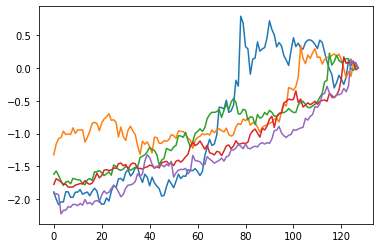

In [11]:
plt.clf()
plt.plot(list(range(X_len)), X_data[0,:])
plt.draw()

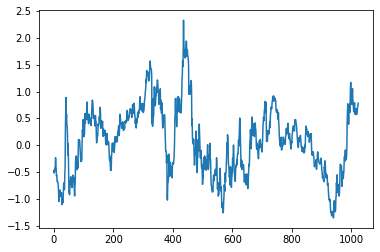

In [12]:
plt.clf()
plt.plot(list(range(len(y_data))), y_data[:,])
plt.draw()

In [25]:
# 모델 생성
lr = 1e-3
model_optimizer = Adam(learning_rate=lr)
#model_optimizer = keras.optimizers.SGD(learning_rate=lr, momentum=0.9)
#model_optimizer = keras.optimizers.Adagrad(learning_rate=lr, epsilon=1e-6)
#model_optimizer = keras.optimizers.RMSprop(learning_rate=lr, rho=0.9, epsilon=1e-06)
predictor = pred_model()
predictor.compile(optimizer=model_optimizer, loss='mse', metrics=[sign_acc])

In [9]:
# 모델 로드
from keras.models import load_model

#predictor = load_weights(Root_dir + 'Output/predictor.h5', compile=False)

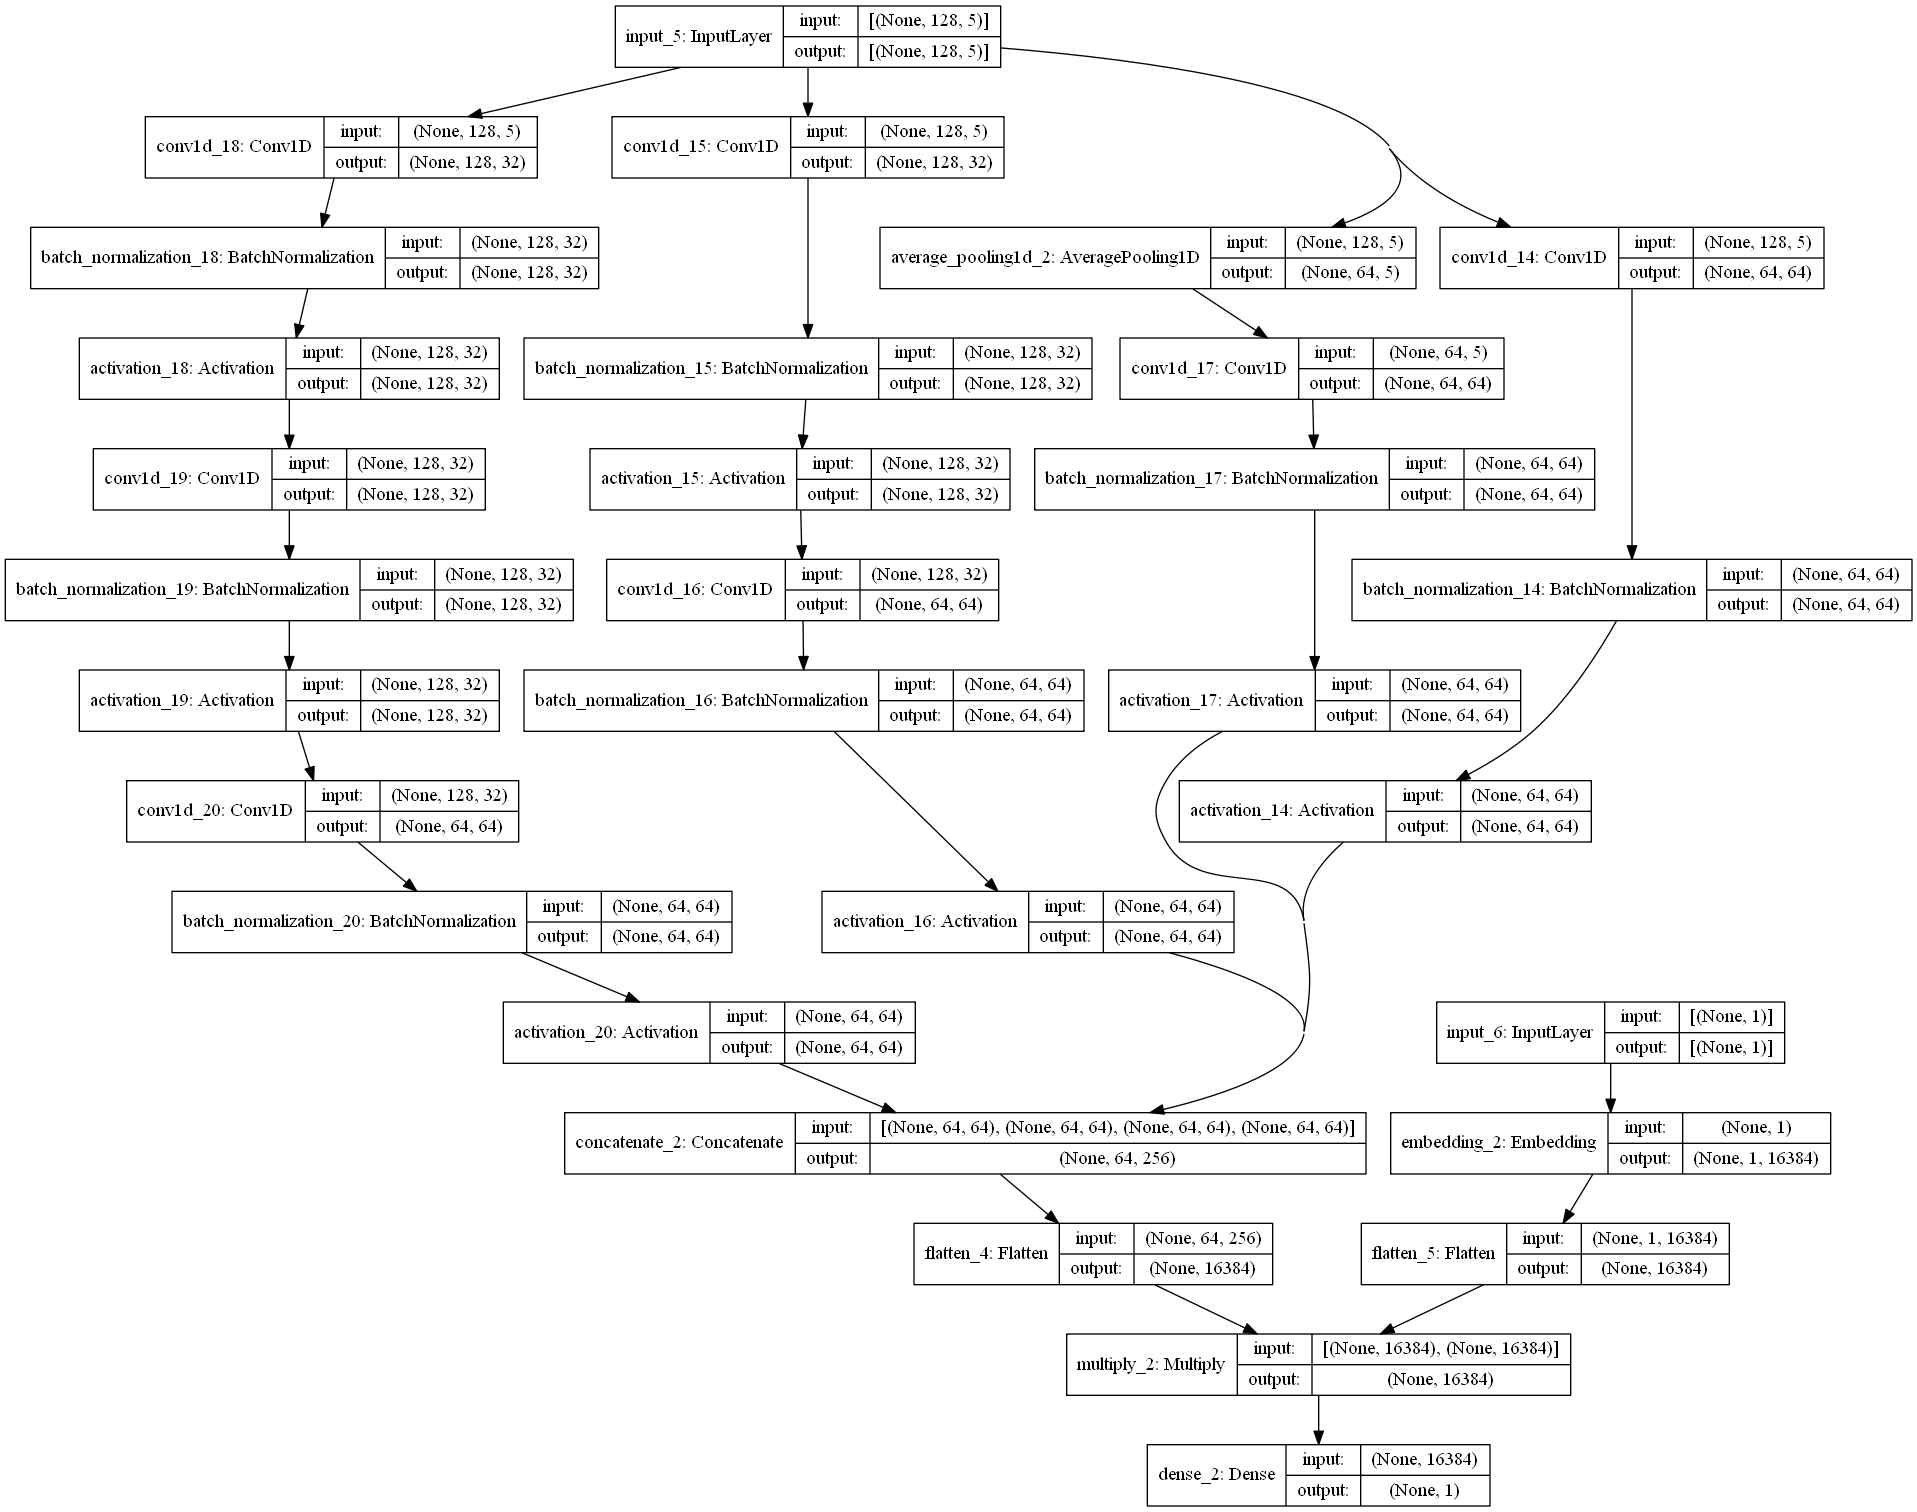

In [26]:
# 모델 모양 출력
import os
#os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

from tensorflow.keras.utils import plot_model
plot_model(predictor, to_file='./model.png', show_shapes=True, expand_nested=True)

In [27]:
# train_ixs 생성
train_ixs = []
train_positions = []
for data_sel in range(len(csv_trains)):
#for data_sel in range(1):
    train_i = csv_trains[data_sel].shape[0] - start_diff - y_windows[-1] * y_len
    train_ixs.append(np.arange(train_i))
    print(train_ixs[-1].shape)

(1335705,)
(369903,)
(718120,)
(672640,)
(520480,)
(794979,)
(591160,)
(874899,)
(489303,)
(586840,)
(1566733,)
(388503,)
(1682947,)
(388503,)
(920979,)
(845379,)
(608920,)
(631540,)
(657040,)
(359877,)
(497583,)
(623320,)
(841059,)
(301025,)
(623320,)
(623320,)
(698680,)
(418503,)
(810819,)
(1276607,)
(1255757,)
(1682947,)
(880659,)
(733720,)
(458043,)
(623320,)
(575800,)
(895059,)
(1253986,)
(849691,)
(1272017,)
(509763,)
(538480,)
(623320,)
(942579,)
(388503,)
(1513473,)
(798639,)
(809019,)
(628720,)
(832419,)
(1546584,)
(557920,)
(1197187,)
(429243,)
(832419,)
(748059,)
(897935,)
(1261247,)
(1377179,)
(581080,)
(509763,)
(581080,)
(538360,)
(411303,)
(759219,)
(822339,)
(627100,)
(479703,)
(1256057,)
(1194309,)
(467463,)
(623320,)
(939699,)
(659920,)
(390423,)
(301025,)
(1272017,)
(859779,)
(1310976,)
(582580,)
(851139,)
(893555,)
(881019,)


In [28]:
seperator = Root_dir + 'Output/'

In [29]:
# loss, acc 그래프
train_losses = []
test_losses = []
train_accs = []
test_accs = []

yields = []
threshold = [0.0, -0.0]
fee_rate = 0.00

In [ ]:
# 학습 진행 + X,y 데이터 생성 + csv_trains

# 배치 데이터
batch_size = 1024
X_data = np.zeros(((batch_size,) + X_shape)); y_data = np.zeros(((batch_size,) + y_shape))
L_data = np.zeros((batch_size, 1))

# fig 데이터
fig_size = 1024
X_train = np.zeros(((fig_size,) + X_shape)); y_train = np.zeros(((fig_size,) + y_shape))
X_test = np.zeros(((fig_size,) + X_shape)); y_test = np.zeros(((fig_size,) + y_shape))

csv_data = csv_trains[idx_trains['BTC']]
ix = np.arange(fig_size)
get_Xy(csv_data[:, 3], ix+start_diff, X_train, y_train)

csv_data = csv_tests[idx_tests['BTC']]
get_Xy(csv_data[:, 3], ix+start_diff, X_test, y_test)

L_train = np.zeros((fig_size, 1)); L_train.fill(idx_trains['BTC'])
L_test = np.zeros((fig_size, 1)); L_test.fill(idx_tests['BTC'])

time_init = time.time()
data_sel = -1
for step in range(10000000):
    #data_sel = (data_sel + 1) % len(csv_trains)
    #data_sel = (data_sel + 1) % 10
    data_sel = np.random.randint(len(csv_trains))
    L_data.fill(data_sel)

    csv_data = csv_trains[data_sel]

    ix = train_ixs[data_sel].copy()
    if len(ix) > 0:
        np.random.shuffle(ix)
        min_ix = min(batch_size, len(ix))
        ix = ix[:min_ix]

        get_Xy(csv_data[:,3], ix+start_diff, X_data[:len(ix)], y_data[:len(ix)])

        history = predictor.fit([X_data[:len(ix)], L_data[:len(ix)]], y_data[:len(ix)], verbose=0, epochs=1, batch_size = batch_size)
        #predictor.train_on_batch(X_data[:len(ix)], y_data[:len(ix)])

    if step % 100 == 0 and step > 1000:
        train_eval = predictor.evaluate([X_train, L_train], y_train, verbose=0)
        test_eval = predictor.evaluate([X_test, L_test], y_test, verbose=0)
        train_losses.append(train_eval[0])
        test_losses.append(test_eval[0])
        train_accs.append(train_eval[1])
        test_accs.append(test_eval[1])

        print('step: ' + str(step))
        print("train_loss: %f, train_acc: %f" % (train_losses[-1], train_accs[-1]))
        print("test_loss:  %f, test_acc:  %f" % (test_losses[-1], test_accs[-1]))

        if np.max(test_accs) == test_accs[-1]:
            predictor.save_weights(seperator + 'best_predictor.h5')

    if step == 0 or time.time() - time_init > 60:
        time_init = time.time()
        y_pred = predictor.predict([X_train, L_train])
        fig = get_fig([y_train, y_pred])
        fig.savefig(seperator + 'train' + str(step) + '.png', dpi=fig.dpi)

        y_pred = predictor.predict([X_test, L_test])
        fig = get_fig([y_test, y_pred])
        fig.savefig(seperator + 'test' + str(step) + '.png', dpi=fig.dpi)

        fig = get_fig([train_losses, test_losses])
        fig.savefig(seperator + 'losses.png', dpi=fig.dpi)

        fig = get_fig([train_accs, test_accs])
        fig.savefig(seperator + 'accs.png', dpi=fig.dpi)

        predictor.save_weights(seperator + 'predictor.h5')

In [10]:
def floor_digit(val, digits):
    val *= 10 ** (digits)
    return float('{1:.{0}f}'.format(digits, math.floor(val) / 10 ** digits))

In [ ]:
# 현물
class StockTrader:
    def __init__(self, predictor, X_data, y_data, csv_data):
        self.today = 0
        self.money = 10000000 # 예수금
        self.amount = 0 # 보유량
        self.value_today = 0 # 오늘가
        self.value_tomorrow = 0 # 내일가
        self.rate_tomorrow = 0
        self.money_total = self.money

        self.fee_rate = 0.00
        self.fee_rate = fee_rate
        
        self.predictor = predictor # 예측모델
        self.X_data = X_data
        self.y_data = y_data
        self.csv_data = csv_data
        self.y_pred = self.y_data
        #self.y_pred = self.predictor.predict(self.X_data)
        self.y_pred = y_pred_global # 전역 변수
        # 0~99 까지의 rate를 통해(즉, 100의 데이터는 알고 있다.) 101의 데이터를 얻어낸 것.

        self.value_log = []
        self.trade_log = []
        self.long_win_log = []
        self.short_win_log = []

    def dayInit(self):
        self.value_today = self.csv_data[self.today,3]
        self.rate_tomorrow = self.y_pred[self.today]

        self.money_total = self.money + self.amount * self.value_today

    def dayStart(self, start_date):
        self.today = start_date
        self.dayInit()
        self.value_log.append(self.value_today)
        self.trade_log.append(0)

    def append_win_log(self):
        if self.trade_log[-1] != self.trade_log[-2]:
            self.value_log.append(self.value_today)
            if self.value_log[-1] > self.value_log[-2]:
                if self.trade_log[-2] == 1:
                    self.long_win_log.append(1)
                else:
                    self.short_win_log.append(0)
            else:
                if self.trade_log[-2] == 1:
                    self.long_win_log.append(0)
                else:
                    self.short_win_log.append(1)
    
    def performAct(self):
        if self.rate_tomorrow > threshold[0]:
            buy_amount = self.money / self.value_today
            self.amount += buy_amount * (1 - self.fee_rate)
            self.money -= buy_amount * self.value_today

            self.trade_log.append(1)
            self.append_win_log()

        elif self.rate_tomorrow < threshold[1]:
            sell_amount = self.amount
            self.amount -= sell_amount
            self.money += (sell_amount * (1 - self.fee_rate)) * self.value_today

            self.trade_log.append(0)
            self.append_win_log()
        
        else:
            self.trade_log.append(self.trade_log[-1])


    def gotoTomorrow(self):
        self.today = self.today + 1
        self.dayInit()
    
    def printState(self):
        print("today: %s" % self.today)
        print("money: %s" % self.money)
        print("amount: %s" % self.amount)
        print("value_today: %s" % self.value_today)
        print("rate_tomorrow: %s" % self.rate_tomorrow)
        print("money_total: %s" % self.money_total)

In [ ]:
# 현물 지정가
class StockTrader:
    def __init__(self, predictor, X_data, y_data, csv_data):
        self.today = 0
        self.money = 10000000 # 예수금
        self.amount = 0 # 보유량
        self.value_today = 0 # 오늘가
        self.value_tomorrow = 0 # 내일가
        self.rate_tomorrow = 0
        self.money_total = self.money

        self.fee_rate = 0.00
        self.fee_rate = fee_rate
        
        self.predictor = predictor # 예측모델
        self.X_data = X_data
        self.y_data = y_data
        self.csv_data = csv_data
        self.y_pred = self.y_data
        #self.y_pred = self.predictor.predict(self.X_data)
        self.y_pred = y_pred_global # 전역 변수
        # 0~99 까지의 rate를 통해(즉, 100의 데이터는 알고 있다.) 101의 데이터를 얻어낸 것.

        self.value_log = []
        self.trade_log = []
        self.long_win_log = []
        self.short_win_log = []

    def dayInit(self):
        self.value_today = self.csv_data[self.today,3]
        self.rate_tomorrow = self.y_pred[self.today]

        self.money_total = self.money + self.amount * self.value_today

    def dayStart(self, start_date):
        self.today = start_date
        self.dayInit()
        self.value_log.append(self.value_today)
        self.trade_log.append(0)

    def append_win_log(self):
        if self.trade_log[-1] != self.trade_log[-2]:
            self.value_log.append(self.value_today)
            if self.value_log[-1] > self.value_log[-2]:
                if self.trade_log[-2] == 1:
                    self.long_win_log.append(1)
                else:
                    self.short_win_log.append(0)
            else:
                if self.trade_log[-2] == 1:
                    self.long_win_log.append(0)
                else:
                    self.short_win_log.append(1)
    
    def performAct(self):
        value_range = 0.0 / 100
        if self.rate_tomorrow > threshold[0]:
            buy_value = self.value_today * (1 - value_range)
            if self.csv_data[self.today+1,2] <= buy_value:
                buy_amount = self.money / buy_value
                self.amount += buy_amount * (1 - self.fee_rate)
                self.money -= buy_amount * buy_value

                self.trade_log.append(1)
                self.append_win_log()

        elif self.rate_tomorrow < threshold[1]:
            sell_value = self.value_today * (1 + value_range)
            if self.csv_data[self.today+1,1] >= sell_value:
                sell_amount = self.amount
                self.amount -= sell_amount
                self.money += (sell_amount * (1 - self.fee_rate)) * sell_value

                self.trade_log.append(0)
                self.append_win_log()
        
        else:
            self.trade_log.append(self.trade_log[-1])


    def gotoTomorrow(self):
        self.today = self.today + 1
        self.dayInit()
    
    def printState(self):
        print("today: %s" % self.today)
        print("money: %s" % self.money)
        print("amount: %s" % self.amount)
        print("value_today: %s" % self.value_today)
        print("rate_tomorrow: %s" % self.rate_tomorrow)
        print("money_total: %s" % self.money_total)

In [ ]:
# 레버리지
class StockTrader:
    def __init__(self, predictor, X_data, y_data, csv_data):
        self.today = 0
        self.money = 10000000 # 예수금
        self.amounts = [0,0] # 보유량
        self.value_today = 0
        self.values_today = [1,1] # 오늘가
        self.value_tomorrow = 0 # 내일가
        self.rate_tomorrow = 0
        self.money_total = self.money

        self.fee_rate = 0.001
        self.fee_rate = fee_rate
        
        self.predictor = predictor # 예측모델
        self.X_data = X_data
        self.y_data = y_data
        self.csv_data = csv_data
        self.y_pred = self.y_data
        #self.y_pred = self.predictor.predict(self.X_data)
        self.y_pred = y_pred_global # 전역 변수
        # 0~99 까지의 rate를 통해(즉, 100의 데이터는 알고 있다.) 101의 데이터를 얻어낸 것.

        self.value_log = []
        self.trade_log = []
        self.long_win_log = []
        self.short_win_log = []

    def dayInit(self):
        global reverlage_rate
        self.rate_today = self.csv_data[self.today,0] / self.csv_data[self.today-1,0] 
        
        self.value_today = self.csv_data[self.today,0]
        self.values_today[0] *= (self.rate_today-1) * reverlage_rate + 1
        self.values_today[1] *= (1-self.rate_today) * reverlage_rate + 1

        self.rate_tomorrow = self.y_pred[self.today]

        self.money_total = self.money + self.amounts[0] * self.values_today[0] + self.amounts[1] * self.values_today[1]

    def dayStart(self, start_date):
        self.today = start_date
        self.dayInit()
        self.value_log.append(self.value_today)
        self.trade_log.append(-1)    

    def append_win_log(self):
        if self.trade_log[-1] != self.trade_log[-2]:
            self.value_log.append(self.value_today)
            if self.value_log[-1] > self.value_log[-2]:
                if self.trade_log[-2] == 1:
                    self.long_win_log.append(1)
                else:
                    self.short_win_log.append(0)
            else:
                if self.trade_log[-2] == 1:
                    self.long_win_log.append(0)
                else:
                    self.short_win_log.append(1)
    
    def performAct(self):
        if self.rate_tomorrow > threshold[0]:
            self.money += self.amounts[1] * self.values_today[1] * (1 - self.fee_rate)
            self.amounts[1] = 0

            buy_amount = self.money / self.values_today[0]
            self.amounts[0] += buy_amount * (1 - self.fee_rate)
            self.money -= buy_amount * self.values_today[0]

            self.trade_log.append(1)
            self.append_win_log()
            
        elif self.rate_tomorrow < threshold[1]:
            self.money += self.amounts[0] * self.values_today[0] * (1 - self.fee_rate)
            self.amounts[0] = 0

            buy_amount = self.money / self.values_today[1]
            self.amounts[1] += buy_amount * (1 - self.fee_rate)
            self.money -= buy_amount * self.values_today[1]

            self.trade_log.append(-1)
            self.append_win_log()
        
        else:
            self.trade_log.append(self.trade_log[-1])
            


    def gotoTomorrow(self):
        self.today = self.today + 1
        self.dayInit()
    
    def printState(self):
        print("today: %s" % self.today)
        print("money: %s" % self.money)
        print("amount: %s" % self.amount)
        print("value_today: %s" % self.value_today)
        print("rate_tomorrow: %s" % self.rate_tomorrow)
        print("money_total: %s" % self.money_total)

In [ ]:
# 레버리지 분할 매매
class StockTrader:
    def __init__(self, predictor, X_data, y_data, csv_data):
        self.today = 0
        self.money = 10000000 # 예수금
        self.amounts = [0,0] # 보유량
        self.value_today = 0
        self.values_today = [1,1] # 오늘가
        self.value_tomorrow = 0 # 내일가
        self.rate_tomorrow = 0
        self.money_total = self.money

        self.fee_rate = 0.001
        self.fee_rate = fee_rate
        
        self.predictor = predictor # 예측모델
        self.X_data = X_data
        self.y_data = y_data
        self.csv_data = csv_data
        self.value_data = csv_data[:,3]
        self.y_pred = self.y_data
        #self.y_pred = self.predictor.predict(self.X_data)
        self.y_pred = y_pred_global # 전역 변수
        # 0~99 까지의 rate를 통해(즉, 100의 데이터는 알고 있다.) 101의 데이터를 얻어낸 것.

        self.value_log = []
        self.trade_log = []
        self.long_win_log = []
        self.short_win_log = []

    def dayInit(self):
        global reverlage_rate
        self.rate_today = self.value_data[self.today] / self.value_data[self.today-1] 
        
        self.value_today = self.value_data[self.today]
        self.values_today[0] *= (self.rate_today-1) * reverlage_rate + 1
        self.values_today[1] *= (1-self.rate_today) * reverlage_rate + 1

        self.rate_tomorrow = self.y_pred[self.today]

        self.money_total = self.money + self.amounts[0] * self.values_today[0] + self.amounts[1] * self.values_today[1]

    def dayStart(self, start_date):
        self.today = start_date
        self.dayInit()
        self.value_log.append(self.value_today)
        self.trade_log.append(0)    

    def append_win_log(self):
        if self.trade_log[-1] != self.trade_log[-2]:
            self.value_log.append(self.value_today)
            if self.value_log[-1] > self.value_log[-2]:
                if self.trade_log[-2] == 1:
                    self.long_win_log.append(1)
                elif self.trade_log[-2] == -1:
                    self.short_win_log.append(0)
            else:
                if self.trade_log[-2] == 1:
                    self.long_win_log.append(0)
                elif self.trade_log[-2] == -1:
                    self.short_win_log.append(1)
    
    def performAct(self):
        if self.rate_tomorrow > threshold[0]:
            self.money += self.amounts[1] * self.values_today[1] * (1 - self.fee_rate) / 2
            self.amounts[1] = self.amounts[1] * 1 / 2

            buy_amount = self.money / self.values_today[0]
            self.amounts[0] += buy_amount * (1 - self.fee_rate)
            self.money -= buy_amount * self.values_today[0]

            self.trade_log.append(1)
            self.append_win_log()
            
        elif self.rate_tomorrow < threshold[1]:
            self.money += self.amounts[0] * self.values_today[0] * (1 - self.fee_rate) / 2
            self.amounts[0] = self.amounts[0] * 1 / 2

            buy_amount = self.money / self.values_today[1]
            self.amounts[1] += buy_amount * (1 - self.fee_rate)
            self.money -= buy_amount * self.values_today[1]

            self.trade_log.append(-1)
            self.append_win_log()
        
        elif self.rate_tomorrow > threshold[0] / 2:
            self.money += self.amounts[1] * self.values_today[1] * (1 - self.fee_rate) / 4
            self.amounts[1] = self.amounts[1] * 3 / 4

            buy_amount = self.money / self.values_today[0]
            self.amounts[0] += buy_amount * (1 - self.fee_rate)
            self.money -= buy_amount * self.values_today[0]

            self.trade_log.append(1)
            self.append_win_log()
            
        elif self.rate_tomorrow < threshold[1] / 2:
            self.money += self.amounts[0] * self.values_today[0] * (1 - self.fee_rate) / 4
            self.amounts[0] = self.amounts[0] * 3 / 4

            buy_amount = self.money / self.values_today[1]
            self.amounts[1] += buy_amount * (1 - self.fee_rate)
            self.money -= buy_amount * self.values_today[1]

            self.trade_log.append(-1)
            self.append_win_log()
        
        else:
            self.trade_log.append(self.trade_log[-1])
            


    def gotoTomorrow(self):
        self.today = self.today + 1
        self.dayInit()
    
    def printState(self):
        print("today: %s" % self.today)
        print("money: %s" % self.money)
        print("amount: %s" % self.amount)
        print("value_today: %s" % self.value_today)
        print("rate_tomorrow: %s" % self.rate_tomorrow)
        print("money_total: %s" % self.money_total)

In [ ]:
# 레버리지 손익절
class StockTrader:
    def __init__(self, predictor, X_data, y_data, csv_data):
        self.today = 0
        self.money = 10000000 # 예수금
        self.amounts = [0,0] # 보유량
        self.value_today = 0
        self.values_today = [1,1] # 오늘가
        self.value_tomorrow = 0 # 내일가
        self.rate_tomorrow = 0
        self.money_total = self.money

        self.fee_rate = 0.001
        self.fee_rate = fee_rate
        
        self.predictor = predictor # 예측모델
        self.X_data = X_data
        self.y_data = y_data
        self.csv_data = csv_data
        self.value_data = csv_data
        self.y_pred = self.y_data
        #self.y_pred = self.predictor.predict(self.X_data)
        self.y_pred = y_pred_global # 전역 변수
        # 0~99 까지의 rate를 통해(즉, 100의 데이터는 알고 있다.) 101의 데이터를 얻어낸 것.

        self.value_log = []
        self.trade_log = []
        self.long_win_log = []
        self.short_win_log = []

        self.flag = 0

    def dayInit(self):
        reverlage_rate = 2
        self.rate_today = self.value_data[self.today] / self.value_data[self.today-1] 
        
        self.value_today = self.value_data[self.today]
        self.values_today[0] *= (self.rate_today-1) * reverlage_rate + 1
        self.values_today[1] *= (1-self.rate_today) * reverlage_rate + 1

        self.rate_tomorrow = self.y_pred[self.today]

        self.money_total = self.money + self.amounts[0] * self.values_today[0] + self.amounts[1] * self.values_today[1]

    def dayStart(self, start_date):
        self.today = start_date
        self.dayInit()
        self.value_log.append(self.value_today)
        self.trade_log.append(0)    

    def append_win_log(self):
        if self.trade_log[-1] != self.trade_log[-2]:
            self.value_log.append(self.value_today)
            if self.value_log[-1] > self.value_log[-2]:
                if self.trade_log[-2] == 1:
                    self.long_win_log.append(1)
                elif self.trade_log[-2] == -1:
                    self.short_win_log.append(0)
            else:
                if self.trade_log[-2] == 1:
                    self.long_win_log.append(0)
                elif self.trade_log[-2] == -1:
                    self.short_win_log.append(1)
    
    def performAct(self):
        if self.flag == 0:
            if self.rate_tomorrow > threshold[0]:
                self.money += self.amounts[1] * self.values_today[1] * (1 - self.fee_rate)
                self.amounts[1] = 0

                buy_amount = self.money / self.values_today[0]
                self.amounts[0] += buy_amount * (1 - self.fee_rate)
                self.money -= buy_amount * self.values_today[0]

                self.trade_log.append(1)
                self.append_win_log()

                self.flag = 1
                
            elif self.rate_tomorrow < threshold[1]:
                self.money += self.amounts[0] * self.values_today[0] * (1 - self.fee_rate)
                self.amounts[0] = 0

                buy_amount = self.money / self.values_today[1]
                self.amounts[1] += buy_amount * (1 - self.fee_rate)
                self.money -= buy_amount * self.values_today[1]

                self.trade_log.append(-1)
                self.append_win_log()

                self.flag = -1

        elif self.flag == 1:
            if self.rate_tomorrow < threshold[0]:
                if self.value_today / self.value_log[-1] > (1+rate_threshold) or self.value_today / self.value_log[-1] < (1-rate_threshold):
                    self.money += self.amounts[0] * self.values_today[0] * (1 - self.fee_rate)
                    self.amounts[0] = 0

                    self.trade_log.append(0)
                    self.append_win_log()

                    self.flag = 0
        
        elif self.flag == -1:
            if self.rate_tomorrow > threshold[1]:
                if self.value_today / self.value_log[-1] > (1+rate_threshold) or self.value_today / self.value_log[-1] < (1-rate_threshold):
                    self.money += self.amounts[1] * self.values_today[1] * (1 - self.fee_rate)
                    self.amounts[1] = 0

                    self.trade_log.append(0)
                    self.append_win_log()

                    self.flag = 0
            

        else:
            self.trade_log.append(self.trade_log[-1])
            


    def gotoTomorrow(self):
        self.today = self.today + 1
        self.dayInit()
    
    def printState(self):
        print("today: %s" % self.today)
        print("money: %s" % self.money)
        print("amount: %s" % self.amount)
        print("value_today: %s" % self.value_today)
        print("rate_tomorrow: %s" % self.rate_tomorrow)
        print("money_total: %s" % self.money_total)

In [ ]:
# 선물
class StockTrader:
    def __init__(self, predictor, X_data, y_data, csv_data):
        self.today = 0
        self.money = 10000000 # 예수금
        self.amounts = [0,0] #/ 보유량
        self.value_today = 0
        self.values_today = [1,1] # 오늘가
        self.value_tomorrow = 0 # 내일가
        self.rate_tomorrow = 0
        self.money_total = self.money
        self.dept = 0

        self.fee_rate = 0.001
        self.fee_rate = fee_rate
        
        self.predictor = predictor # 예측모델
        self.X_data = X_data
        self.y_data = y_data
        self.csv_data = csv_data
        self.y_pred = self.y_data
        #self.y_pred = self.predictor.predict(self.X_data)
        self.y_pred = y_pred_global # 전역 변수
        # 0~99 까지의 rate를 통해(즉, 100의 데이터는 알고 있다.) 101의 데이터를 얻어낸 것.

        self.value_log = []
        self.trade_log = []
        self.long_win_log = []
        self.short_win_log = []

    def dayInit(self):
        reverlage_rate = 1
        self.rate_today = self.csv_data[self.today,0] / self.csv_data[self.today-1,0] 
        
        self.value_today = self.csv_data[self.today,0]
        self.values_today[0] *= (self.rate_today-1) * reverlage_rate + 1
        self.values_today[1] *= (1-self.rate_today) * reverlage_rate + 1

        self.rate_tomorrow = self.y_pred[self.today]

        self.money_total = self.money + self.amounts[0] * self.values_today[0] + self.amounts[1] * self.values_today[1] - self.dept
        if self.money_total < 0:
            self.money = 0; self.dept = 0
            self.amounts[0] = 0; self.amounts[1] = 0
            self.money_total = 0

    def dayStart(self, start_date):
        self.today = start_date
        self.dayInit()
        self.value_log.append(self.value_today)
        self.trade_log.append(0)    

    def append_win_log(self):
        if self.trade_log[-1] != self.trade_log[-2]:
            self.value_log.append(self.value_today)
            if self.value_log[-1] > self.value_log[-2]:
                if self.trade_log[-2] == 1:
                    self.long_win_log.append(1)
                elif self.trade_log[-2] == -1:
                    self.short_win_log.append(0)
            else:
                if self.trade_log[-2] == 1:
                    self.long_win_log.append(0)
                elif self.trade_log[-2] == -1:
                    self.short_win_log.append(1)
    
    def controlPosition(self, position_rates):
        global margin_rate
        current_rates = []
        for i_position in range(len(self.amounts)): # 포지션 확인
            current_rates.append(self.amounts[i_position] * self.values_today[i_position] / self.money_total)

        for i_position in range(len(self.amounts)): # 포지션 매도
            if position_rates[i_position] * margin_rate < current_rates[i_position]:
                diff_rate = current_rates[i_position] - position_rates[i_position] * margin_rate
                sell_amount = self.money_total / self.values_today[i_position] * diff_rate
                self.money += sell_amount * self.values_today[i_position] * (1 - self.fee_rate)
                self.amounts[i_position] -= sell_amount

        if margin_rate > 1: # 선물 차용
            self.money -= self.dept
            self.dept = self.money * (margin_rate - 1)
            self.money += self.dept

        for i_position in range(len(self.amounts)): # 포지션 매수
            if position_rates[i_position] * margin_rate > current_rates[i_position]:
                diff_rate = position_rates[i_position] * margin_rate - current_rates[i_position]
                buy_amount = self.money_total / self.values_today[i_position] * diff_rate
                self.amounts[i_position] += buy_amount * (1 - self.fee_rate)
                self.money -= buy_amount * self.values_today[i_position]
        
        self.money_total = self.money + self.amounts[0] * self.values_today[0] + self.amounts[1] * self.values_today[1] - self.dept


    def performAct(self):
        if self.rate_tomorrow > threshold[0]:
            self.controlPosition([1.0, 0.0])

            self.trade_log.append(1)
            self.append_win_log()
            
        elif self.rate_tomorrow < threshold[1]:
            self.controlPosition([0.0, 1.0])

            self.trade_log.append(-1)
            self.append_win_log()

        else:
            self.trade_log.append(self.trade_log[-1])


    def gotoTomorrow(self):
        self.today = self.today + 1
        self.dayInit()
    
    def printState(self):
        print("today: %s" % self.today)
        print("money: %s" % self.money)
        print("amount: %s" % self.amount)
        print("value_today: %s" % self.value_today)
        print("rate_tomorrow: %s" % self.rate_tomorrow)
        print("money_total: %s" % self.money_total)

In [72]:
# 선물 실제
class StockTrader:
    def __init__(self, csv_data, y_pred):
        self.today = 0
        self.money = 10000000 # 예수금
        self.amount = 0 # 보유량
        self.value_today = 0
        self.y_today = 0
        self.money_total = self.money

        global margin_rate
        self.margin_rate = margin_rate
        global fee_rate
        self.fee_rate = fee_rate

        self.csv_data = csv_data
        self.y_pred = y_pred

        global threshold
        self.threshold = threshold

        self.value_log = []
        self.trade_log = []
        self.long_win_log = []
        self.short_win_log = []

        self.position_rate = 0

    def dayInit(self):
        self.value_today = self.csv_data[self.today,3]
        self.y_today = self.y_pred[self.today]

        self.money_total = self.money + self.amount * self.value_today
        if self.money_total < 0:
            self.money = 0;
            self.amount = 0
            self.money_total = 0

    def dayStart(self, start_date):
        self.today = start_date
        self.dayInit()
        self.value_log.append(self.value_today)
        self.trade_log.append(0)    

    def append_win_log(self):
        if self.trade_log[-1] != self.trade_log[-2]:
            self.value_log.append(self.value_today)
            if self.value_log[-1] > self.value_log[-2]:
                if self.trade_log[-2] == 1:
                    self.long_win_log.append(1)
                elif self.trade_log[-2] == -1:
                    self.short_win_log.append(0)
            else:
                if self.trade_log[-2] == 1:
                    self.long_win_log.append(0)
                elif self.trade_log[-2] == -1:
                    self.short_win_log.append(1)

    def buyAmount(self, amount_rate):
        self.money_total = self.money + self.amount * self.value_today
        available_money = self.money_total * self.margin_rate - self.amount * self.value_today

        if available_money > self.money_total * self.margin_rate * 0.05:
            #print("BUY: " + str(self.value_today))
            buy_amount = available_money / self.value_today * amount_rate
            self.money -= buy_amount * self.value_today
            self.amount += buy_amount * (1 - self.fee_rate)

    def sellAmount(self, amount_rate):
        self.money_total = self.money + self.amount * self.value_today
        available_money = self.money_total * self.margin_rate + self.amount * self.value_today

        if available_money > self.money_total * self.margin_rate * 0.05:
            #print("SELL: " + str(self.value_today))
            sell_amount = available_money / self.value_today * amount_rate
            self.money += sell_amount * self.value_today * (1 - self.fee_rate)
            self.amount -= sell_amount

    def performAct(self):
        if self.amount * self.value_today > self.money_total * (self.margin_rate * 2.0):
            self.sellAmount(0.5)
        elif -1 * self.amount * self.value_today > self.money_total * (self.margin_rate * 2.0):
            self.buyAmount(0.5)

        if self.y_today > self.threshold[0]:
            self.buyAmount(1.0)

            self.trade_log.append(1)
            self.append_win_log()
            
        elif self.y_today < self.threshold[1]:
            self.sellAmount(1.0)

            self.trade_log.append(-1)
            self.append_win_log()

        else:
            self.trade_log.append(self.trade_log[-1])


    def gotoTomorrow(self):
        self.today = self.today + 1
        self.dayInit()
    
    def printState(self):
        print("today: %s" % self.today)
        print("money: %s" % self.money)
        print("amount: %s" % self.amount)
        print("value_today: %s" % self.value_today)
        print("money_total: %s" % self.money_total)

In [69]:
# 선물 실제 + 지정가
class StockTrader:
    def __init__(self, csv_data, y_pred):
        self.today = 0
        self.money = 10000000 # 예수금
        self.amount = 0 # 보유량
        self.value_today = 0
        self.y_today = 0
        self.money_total = self.money

        global margin_rate
        self.margin_rate = margin_rate
        global fee_rate
        self.fee_rate = fee_rate

        self.csv_data = csv_data
        self.y_pred = y_pred

        global threshold
        self.threshold = threshold

        global limit_rate
        self.limit_rate = limit_rate

        self.value_log = []
        self.trade_log = []
        self.long_win_log = []
        self.short_win_log = []

        self.position_rate = 0

    def dayInit(self):
        self.value_today = self.csv_data[self.today,3]
        self.y_today = self.y_pred[self.today]

        self.money_total = self.money + self.amount * self.value_today
        if self.money_total < 0:
            self.money = 0
            self.amount = 0
            self.money_total = 0

    def dayStart(self, start_date):
        self.today = start_date
        self.dayInit()
        self.value_log.append(self.value_today)
        self.trade_log.append(0)

    def append_win_log(self, log):
        self.trade_log.append(log)
        self.value_log.append(self.limit_value)
        if self.value_log[-1] > self.value_log[-2]:
            if self.trade_log[-2] == 1:
                self.long_win_log.append(1)
            elif self.trade_log[-2] == -1:
                self.short_win_log.append(0)
        else:
            if self.trade_log[-2] == 1:
                self.long_win_log.append(0)
            elif self.trade_log[-2] == -1:
                self.short_win_log.append(1)

    def buyAmount(self, amount_rate):
        if self.amount <= 0:
            self.low_tomorrow = self.csv_data[self.today+1, 2]
            self.limit_value = self.value_today * (1 - self.limit_rate)
            self.money_total = self.money + self.amount * self.limit_value
            available_money = self.money_total * self.margin_rate - self.amount * self.limit_value
            if self.limit_value >= self.low_tomorrow and available_money > self.money_total * self.margin_rate * 0.1:
                buy_amount = available_money / self.limit_value * amount_rate
                #print("BUY: " + str(self.limit_value), buy_amount)
                self.money -= buy_amount * self.limit_value
                self.amount += buy_amount * (1 - self.fee_rate)

                self.append_win_log(1)

    def sellAmount(self, amount_rate):
        if self.amount >= 0:
            self.high_tomorrow = self.csv_data[self.today+1, 1]
            self.limit_value = self.value_today * (1 + self.limit_rate)
            self.money_total = self.money + self.amount * self.limit_value
            available_money = self.money_total * self.margin_rate + self.amount * self.limit_value
            if self.limit_value <= self.high_tomorrow and available_money > self.money_total * self.margin_rate * 0.1:
                sell_amount = available_money / self.limit_value * amount_rate
                #print("SELL: " + str(self.limit_value), sell_amount)
                self.money += sell_amount * self.limit_value * (1 - self.fee_rate)
                self.amount -= sell_amount

                self.append_win_log(-1)


    def performAct(self):
        if self.amount * self.value_today > self.money_total * (self.margin_rate * 2.0):
            self.sellAmount(0.5)
        elif -1 * self.amount * self.value_today > self.money_total * (self.margin_rate * 2.0):
            self.buyAmount(0.5)

        if self.y_today > self.threshold[0]:
            self.buyAmount(1.0)

        elif self.y_today < self.threshold[1]:
            self.sellAmount(1.0)
        
        self.money_total = self.money + self.amount * self.value_today


    def gotoTomorrow(self):
        self.today = self.today + 1
        self.dayInit()

    def printState(self):
        print("today: %s" % self.today)
        print("money: %s" % self.money)
        print("amount: %s" % self.amount)
        print("value_today: %s" % self.value_today)
        print("money_total: %s" % self.money_total)

In [ ]:
# 선물 실제 분할 매매
class StockTrader:
    def __init__(self, csv_data, y_pred):
        self.today = 0
        self.money = 10000000 # 예수금
        self.amount = 0 #/ 보유량
        self.value_today = 0
        self.y_today = 0
        self.money_total = self.money

        global margin_rate
        self.margin_rate = margin_rate
        global fee_rate
        self.fee_rate = fee_rate
        
        self.csv_data = csv_data
        self.y_pred = y_pred

        self.value_log = []
        self.trade_log = []
        self.long_win_log = []
        self.short_win_log = []

    def dayInit(self):
        self.value_today = self.csv_data[self.today,3]
        self.y_today = self.y_pred[self.today]

        self.money_total = self.money + self.amount * self.value_today
        if self.money_total < 0:
            self.money = 0;
            self.amount = 0
            self.money_total = 0

    def dayStart(self, start_date):
        self.today = start_date
        self.dayInit()
        self.value_log.append(self.value_today)
        self.trade_log.append(0)    

    def append_win_log(self):
        if self.trade_log[-1] != self.trade_log[-2]:
            self.value_log.append(self.value_today)
            if self.value_log[-1] > self.value_log[-2]:
                if self.trade_log[-2] == 1:
                    self.long_win_log.append(1)
                elif self.trade_log[-2] == -1:
                    self.short_win_log.append(0)
            else:
                if self.trade_log[-2] == 1:
                    self.long_win_log.append(0)
                elif self.trade_log[-2] == -1:
                    self.short_win_log.append(1)
    
    def buyAmount(self, amount_rate):
        self.money_total = self.money + self.amount * self.value_today
        available_money = self.money_total * self.margin_rate - self.amount * self.value_today
        
        buy_amount = available_money / self.value_today * amount_rate
        self.money -= buy_amount * self.value_today
        self.amount += buy_amount * (1 - self.fee_rate)

    def sellAmount(self, amount_rate):
        self.money_total = self.money + self.amount * self.value_today
        available_money = self.money_total * self.margin_rate + self.amount * self.value_today
        
        sell_amount = available_money / self.value_today * amount_rate
        self.money += sell_amount * self.value_today * (1 - self.fee_rate)
        self.amount -= sell_amount

    def performAct(self):
        if self.y_today > threshold[0]:
            self.buyAmount(0.5)

            self.trade_log.append(1)
            self.append_win_log()
        
        elif self.y_today > threshold[0] * 0.5:
            self.buyAmount(0.25)

            self.trade_log.append(1)
            self.append_win_log()
            
        elif self.y_today < threshold[1]:
            self.sellAmount(0.5)

            self.trade_log.append(-1)
            self.append_win_log()
        
        elif self.y_today < threshold[1] * 0.5:
            self.sellAmount(0.25)

            self.trade_log.append(-1)
            self.append_win_log()

        else:
            self.trade_log.append(self.trade_log[-1])


    def gotoTomorrow(self):
        self.today = self.today + 1
        self.dayInit()
    
    def printState(self):
        print("today: %s" % self.today)
        print("money: %s" % self.money)
        print("amount: %s" % self.amount)
        print("value_today: %s" % self.value_today)
        print("money_total: %s" % self.money_total)

In [64]:
def getYield(csv_data, y_pred):
    period = y_pred.shape[0]
    trader = StockTrader(csv_data, y_pred)

    trader.dayStart(0)

    money_list = []
    value_list = []

    for i in range(period - 0): # 마지막 1번의 예측 미수행(y가 없으므로)
        trader.dayInit()
        trader.performAct()
        money_list.append(trader.money_total)
        value_list.append(trader.value_today)
        trader.today += 1
        #trader.printState()
    '''
    plt.clf()
    #plt.plot(list(range(len(win_list))), win_list)
    plt.plot(list(range(len(value_list))), value_list/value_list[0])
    plt.plot(list(range(len(money_list))), money_list/money_list[0])
    plt.show()
    '''
    money_list = np.array(money_list)
    value_list = np.array(value_list)
    trade_num = [len(trader.long_win_log), len(trader.short_win_log)]
    win_rate = [np.mean(trader.long_win_log) * 100, np.mean(trader.short_win_log) * 100]
    trading_yield = (money_list[len(money_list)-1]/money_list[0] - \
                     value_list[len(value_list)-1]/value_list[0]) * 100

    trading_info = [trader.trade_log, trade_num, win_rate, trading_yield]

    return trading_info, money_list, value_list

In [65]:
from keras.models import load_model
#predictor = load_model(Root_dir + 'Output/best_predictor.h5', compile=False)
best_predictor = predictor

In [66]:
predictor.save(Root_dir + 'Output/predictor.h5')

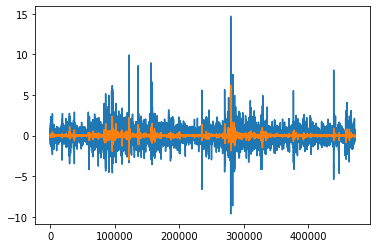

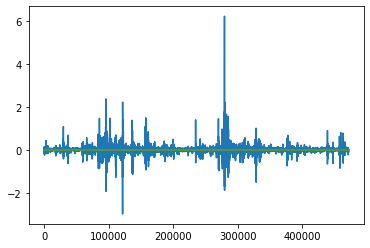

거래횟수: 20438, 20439 회
승률: 52.236030922790874, 51.80781838641813 %
수익률: 8.853457821653388 %


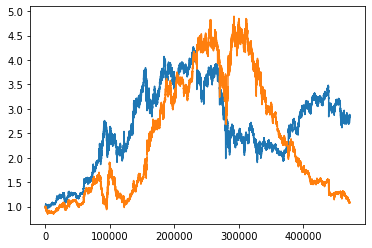

[0.03322522]


In [73]:
csv_data = csv_tests[idx_tests['BTC']]
data_start = 0
period = csv_data.shape[0] - start_diff - data_start - y_len

predict = True
predict = False
div_num = 1000
if predict:
    y_preds = np.zeros((0,) + y_shape)
    y_datas = np.zeros((0,) + y_shape)
    period_start = data_start
    div_period = int(period / div_num)
    for i_period in range(div_num):
        ix = np.arange(period_start, period_start+div_period)

        X_data = np.zeros(((len(ix),) + X_shape))
        y_data = np.zeros(((len(ix),) + y_shape))
        get_Xy(csv_data[:,3], ix+start_diff, X_data, y_data)
        L_data = np.zeros((len(ix),1)); L_data.fill(idx_tests['BTC'])

        y_pred = y_data
        y_pred = best_predictor.predict([X_data, L_data])

        y_preds = np.append(y_preds, y_pred, axis=0)
        y_datas = np.append(y_datas, y_data, axis=0)

        period_start = period_start + div_period

y_pred = y_preds
y_data = y_datas

margin_rate = 1
reverlage_rate = 1
th = 0.0
threshold = [th, -th]
fee_rate = -0.0 / 100
limit_rate = 0.0 / 100

plt.clf()
plt.plot(list(range(len(y_data))), y_data)
plt.plot(list(range(len(y_pred))), y_pred)
plt.show()

threshold_line = np.zeros((y_pred.shape[0], len(threshold)))
threshold_line[:,0] = threshold[0]
threshold_line[:,1] = threshold[1]
plt.clf()
plt.plot(list(range(len(y_pred))), y_pred)
plt.plot(list(range(len(threshold_line))), threshold_line)
plt.show()

trading_info, money_list, value_list = getYield(csv_data[data_start+start_diff:], y_pred)
# trade_log, trade_num, win_rate, trading_yield
print("거래횟수: %s, %s 회" % (trading_info[1][0], trading_info[1][1]))
print("승률: %s, %s %%" % (trading_info[2][0], trading_info[2][1]))
#print("수익률: %s %%" % trading_info[3])
yields = (money_list[-1]/money_list[0] - 1) * 100
print("수익률: %s %%" % yields)

plt.clf()
plt.plot(list(range(len(value_list))), value_list/value_list[0])
plt.plot(list(range(len(money_list))), money_list/money_list[0])

trade_log = np.array(trading_info[0]) * (np.max(value_list)/value_list[0] - np.min(value_list)/value_list[0]) + np.min(value_list)/value_list[0]
#plt.plot(list(range(len(trading_info[0]))), trade_log)
plt.show()
print(y_preds[-1])

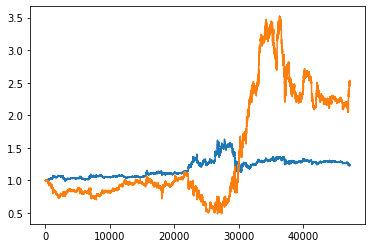

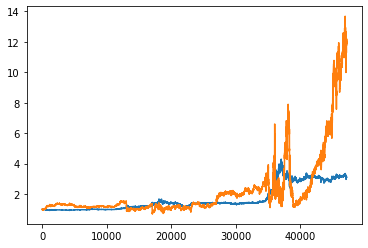

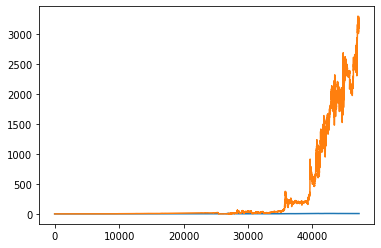

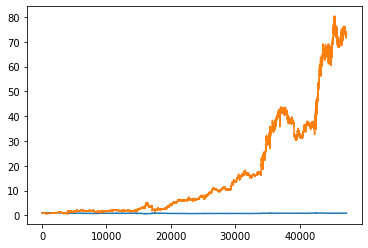

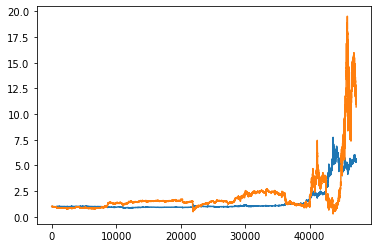

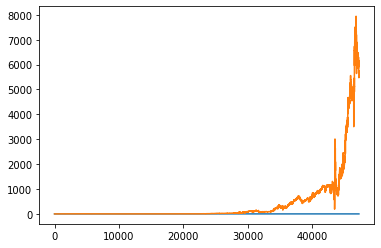

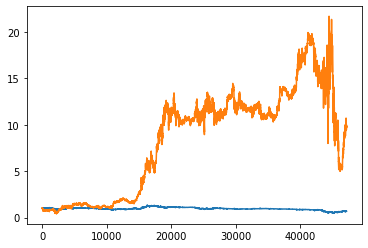

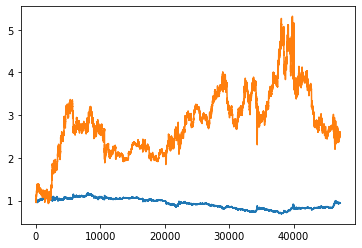

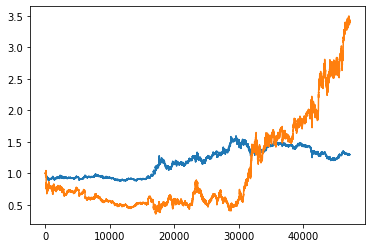

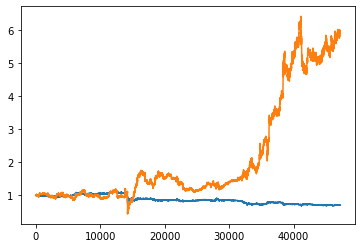

In [101]:
yields = []
period = int(len(value_list)/10)
for i in range(10):
    start = period * i
    plt.clf()
    plt.plot(list(range(period)), value_list[start:start+period]/value_list[start])
    plt.plot(list(range(period)), money_list[start:start+period]/money_list[start])
    plt.show()
    yields.append(money_list[start+period-1]/money_list[start])

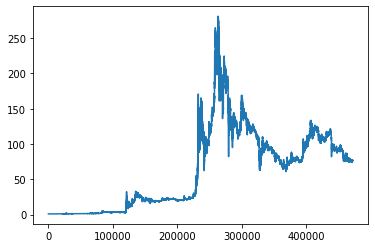

In [85]:
plt.clf()
plt.plot(list(range(len(value_list))), value_list/value_list[0])
plt.show()

In [95]:
max_money = money_list[0]
period = 3000
money_diff = []
for i_batch in range(len(money_list)-period):
    max_money = money_list[i_batch]
    min_money = min(money_list[i_batch:i_batch+period])
    money_diff.append(1-min_money/max_money)

print(max(money_diff)*100) # 시작점 대비 최대 손실율
print(np.mean(money_diff)*100) # 평균 손실율

71.8602554476123
7.394684783232021


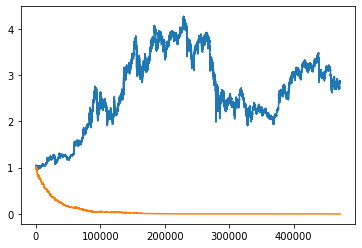

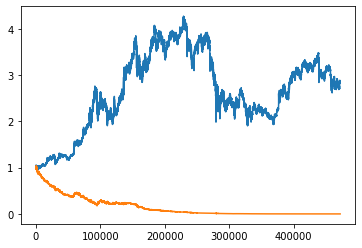

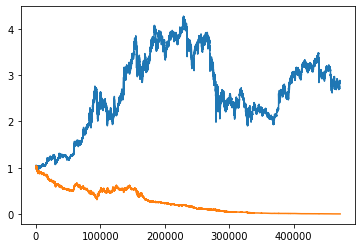

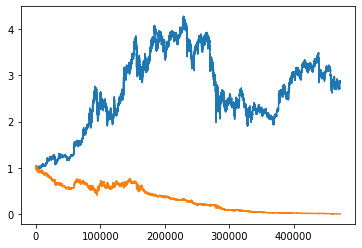

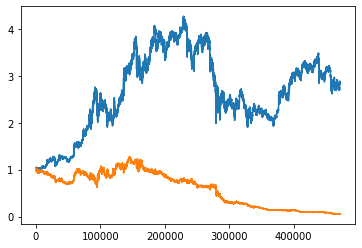

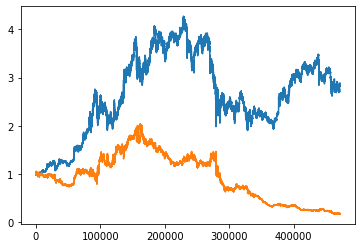

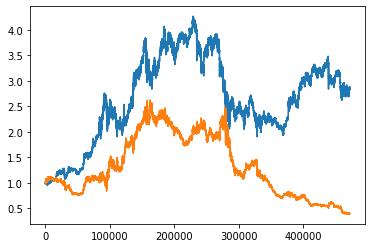

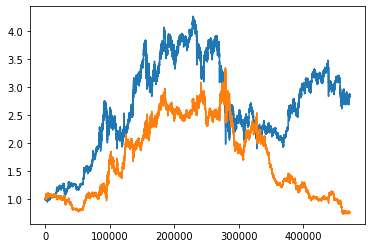

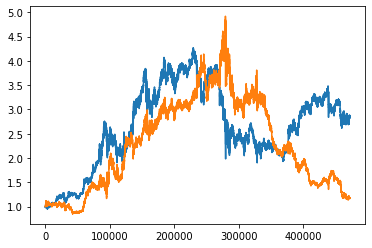

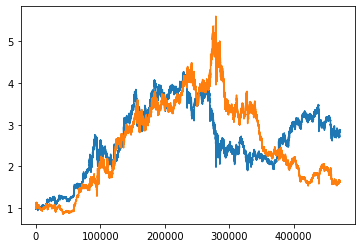

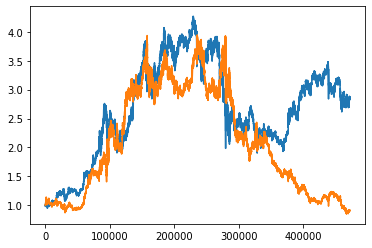

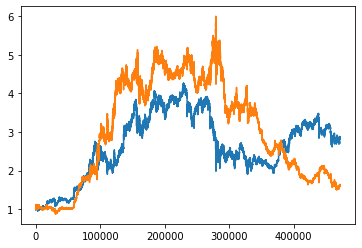

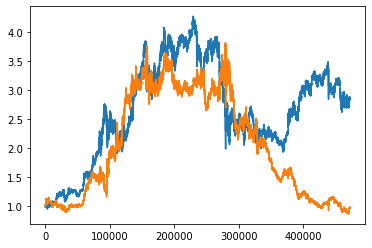

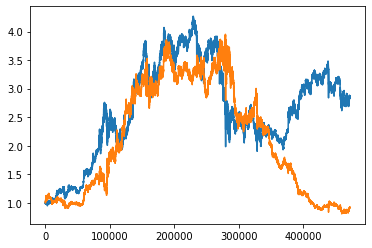

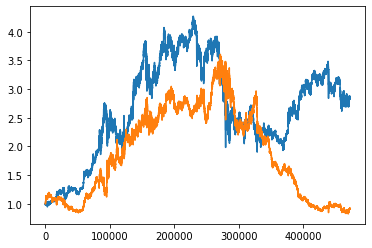

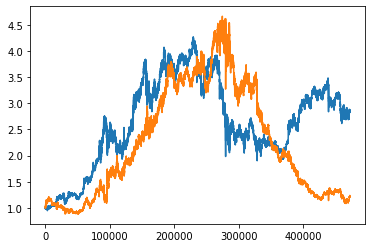

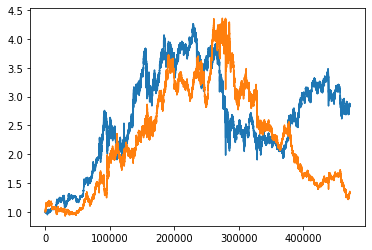

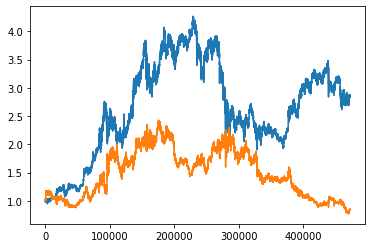

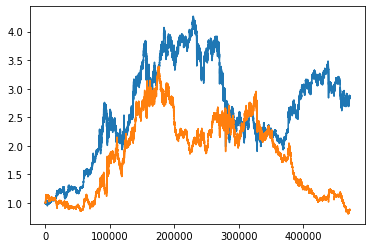

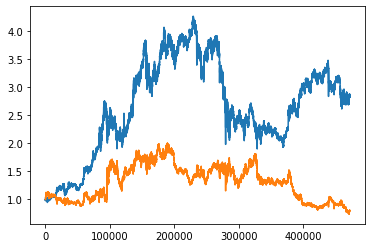

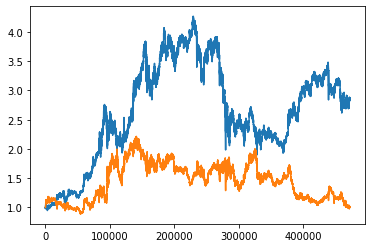

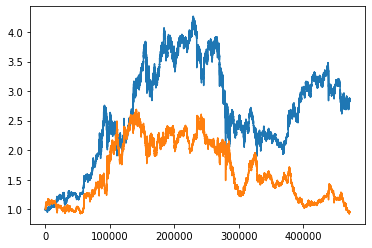

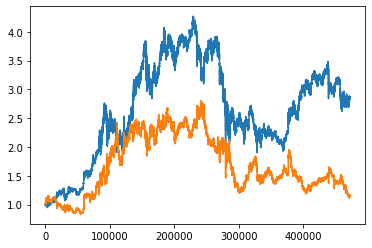

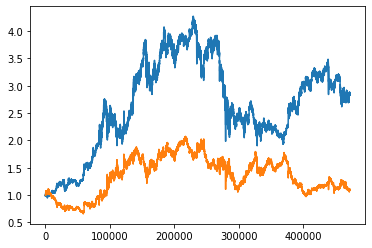

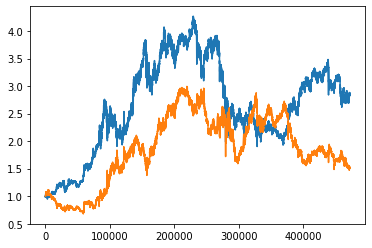

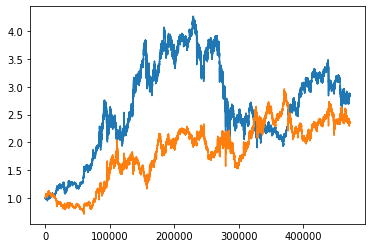

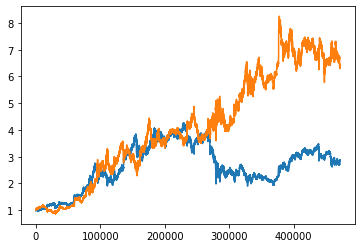

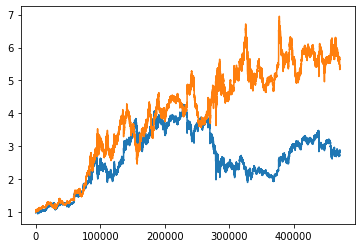

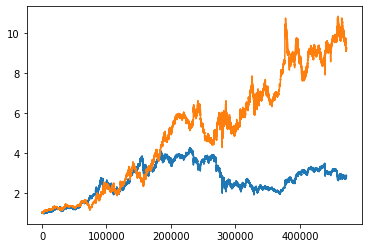

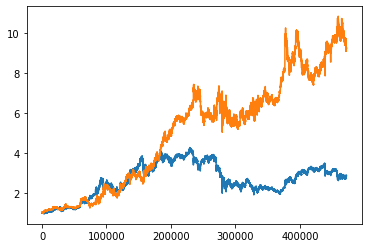

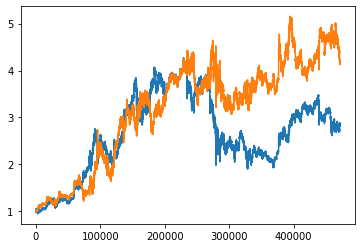

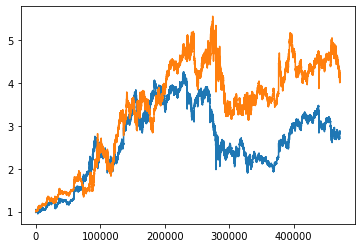

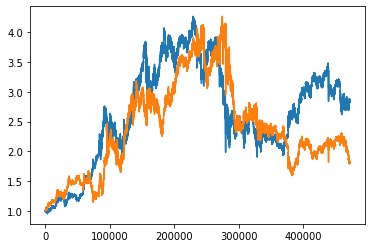

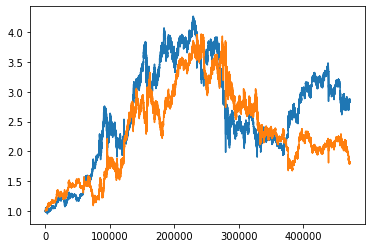

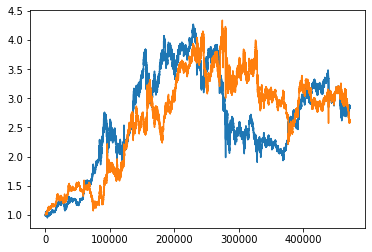

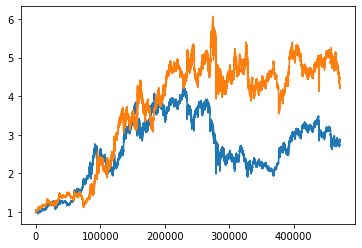

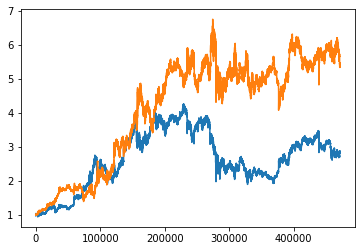

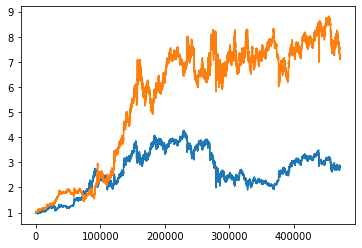

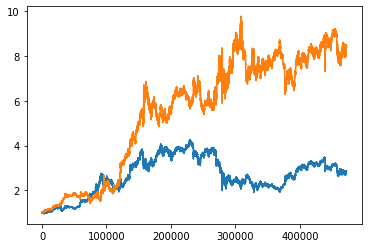

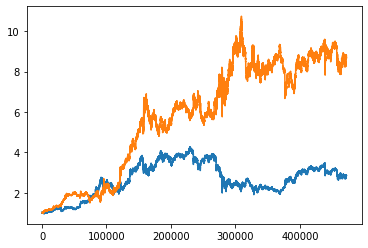

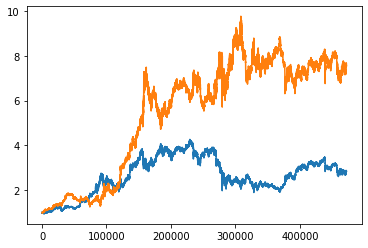

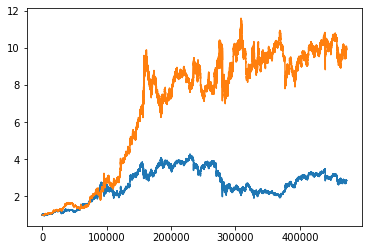

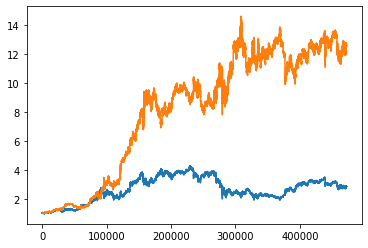

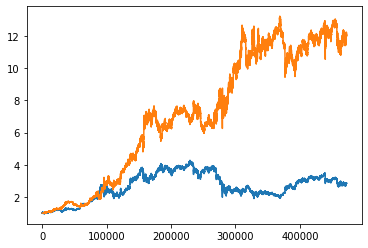

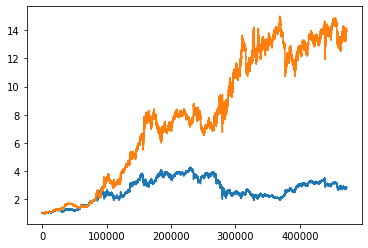

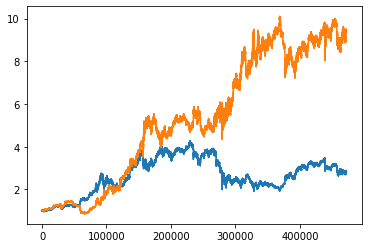

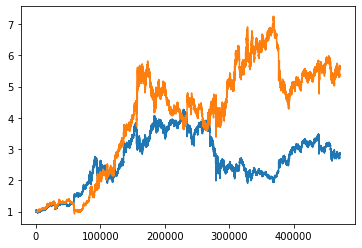

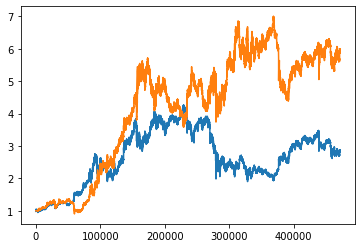

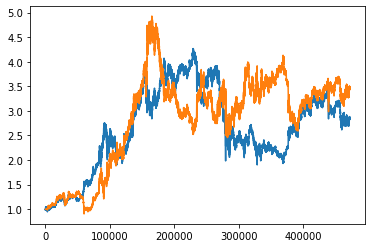

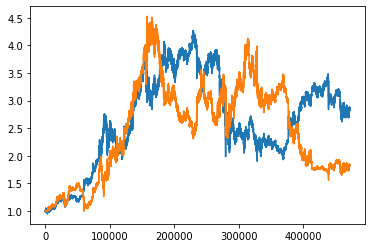

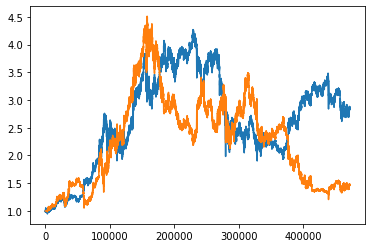

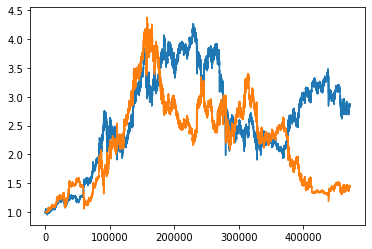

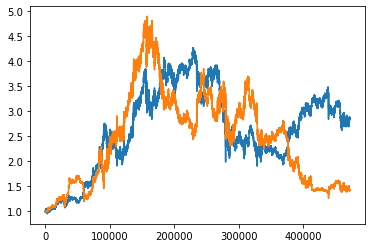

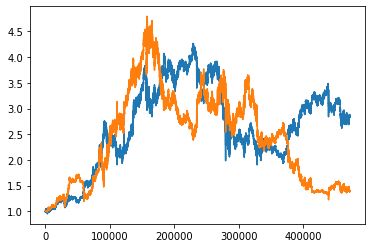

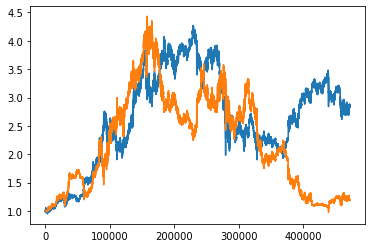

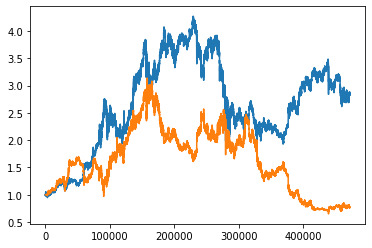

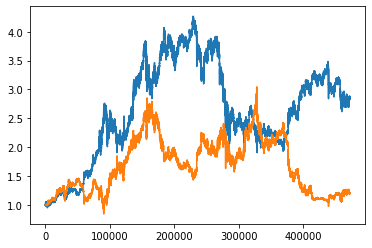

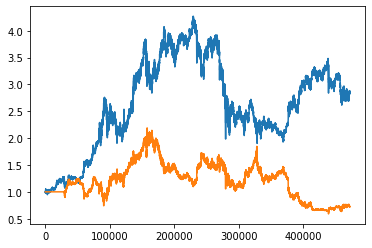

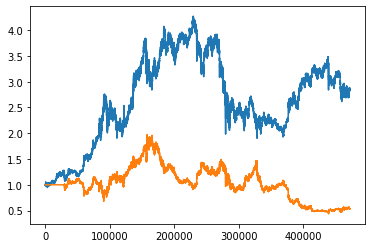

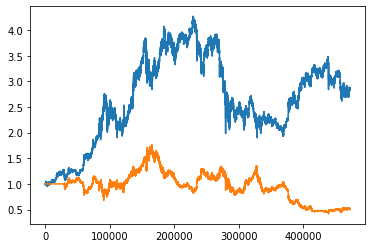

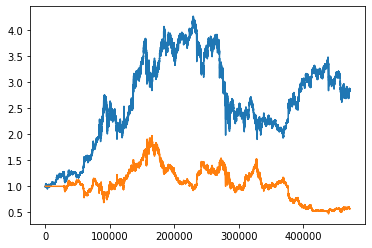

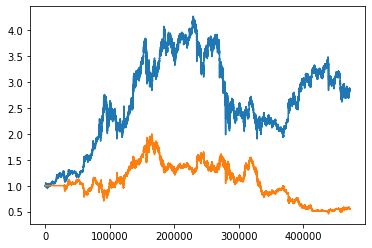

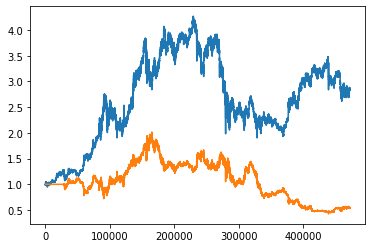

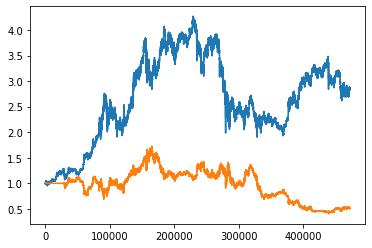

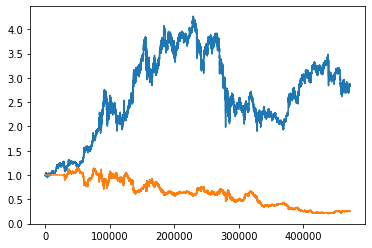

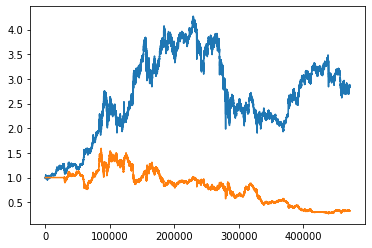

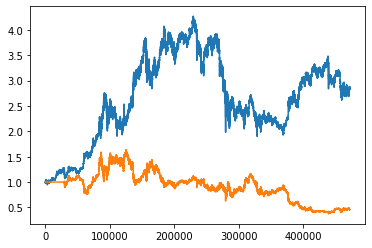

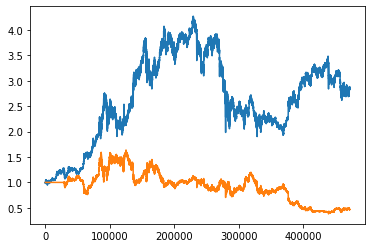

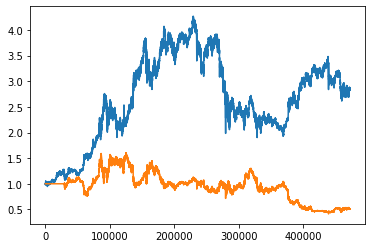

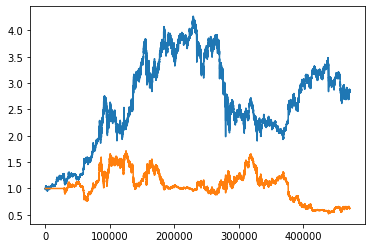

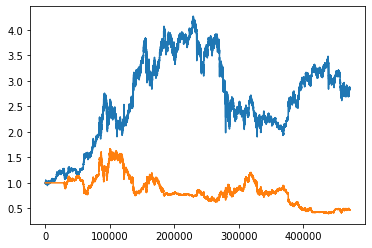

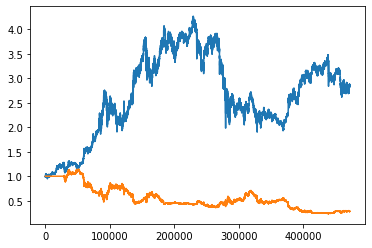

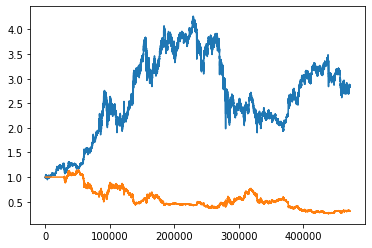

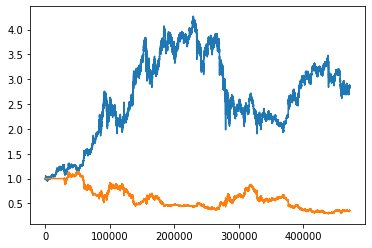

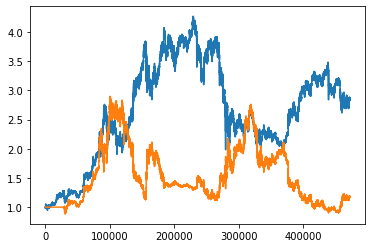

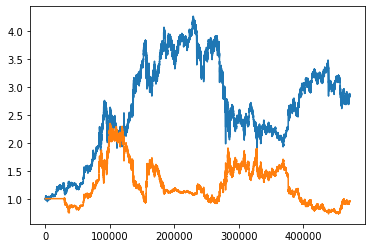

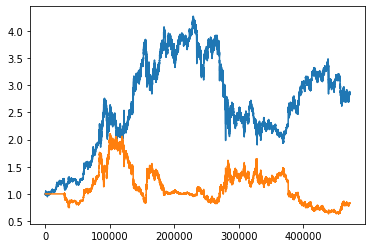

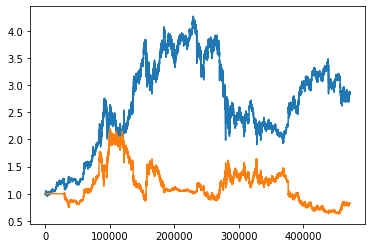

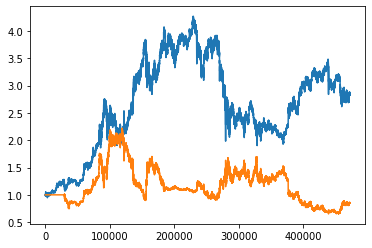

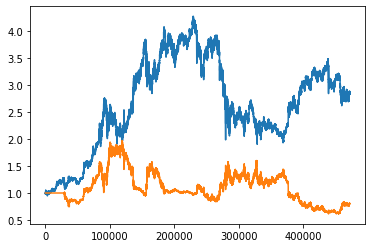

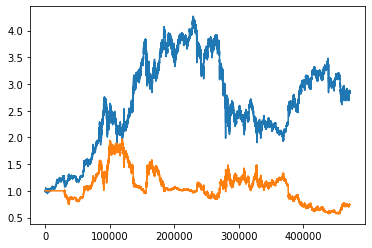

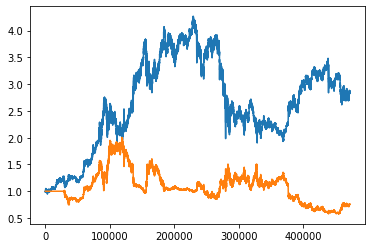

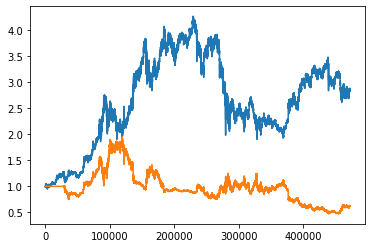

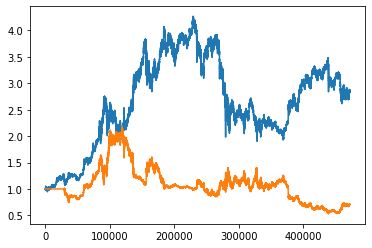

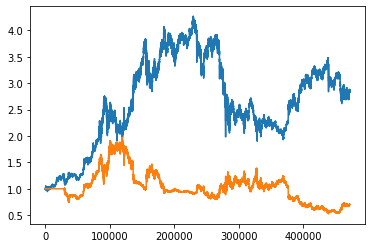

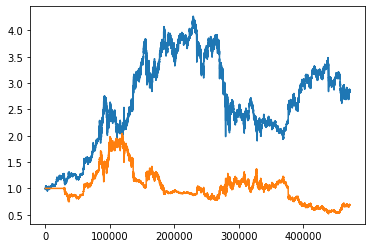

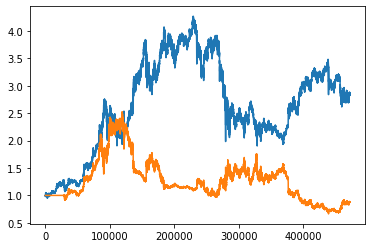

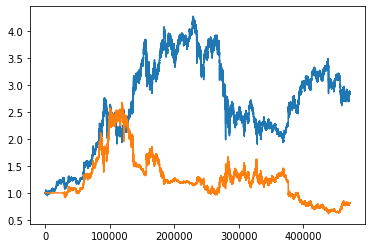

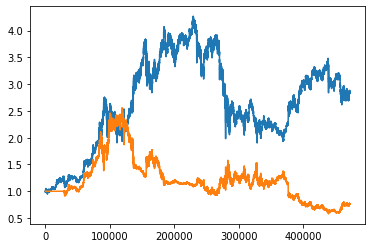

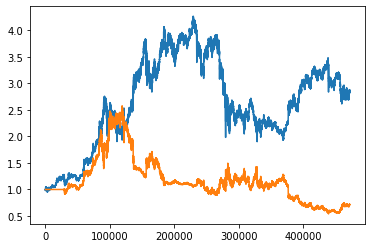

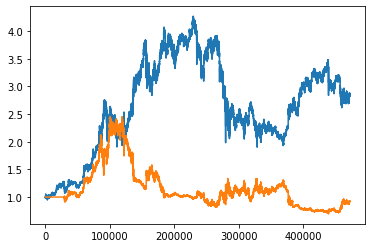

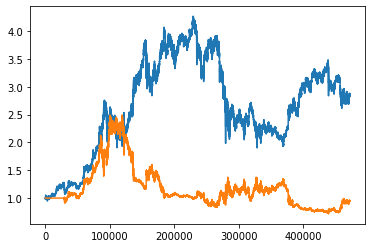

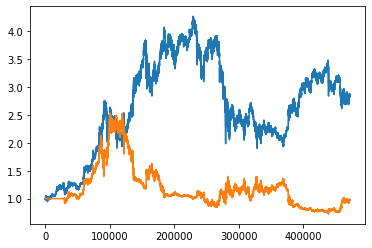

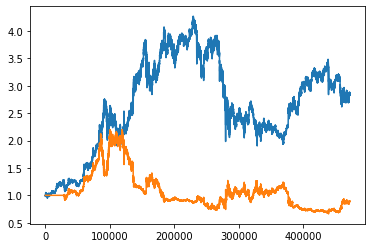

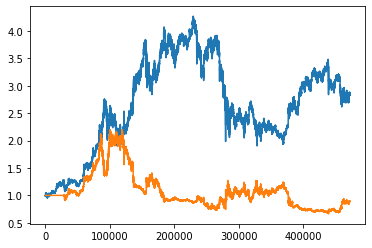

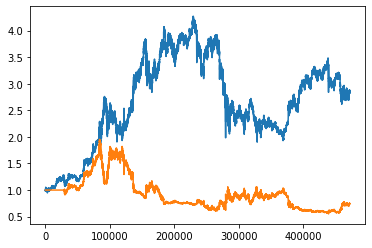

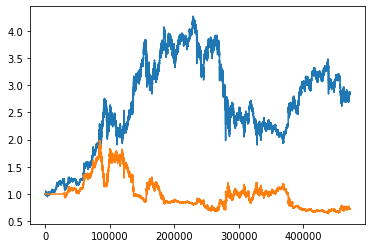

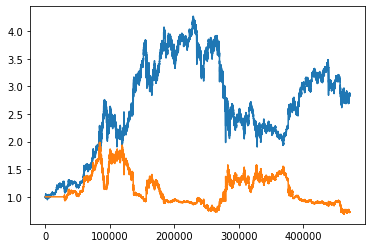

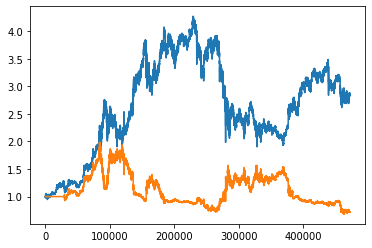

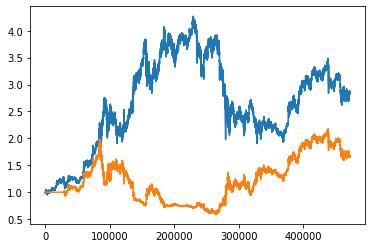

In [69]:
# threshold 최적화
yields = []
win_rates = []

margin_rate = 1
fee_rate = 0.017 / 100

mul_threshold = 1.0 / 100

for i in range(100):
    threshold = [0.0 + mul_threshold * i, 0.0 - mul_threshold * i]
    trading_info, money_list, value_list = getYield(csv_data[data_start+start_diff:], y_pred)
    win_rates.append(trading_info[2])
    yields.append((money_list[-1]/money_list[0] - 1) * 100)

    plt.clf()
    plt.plot(list(range(len(value_list))), value_list/value_list[0])
    plt.plot(list(range(len(money_list))), money_list/money_list[0])
    plt.show()

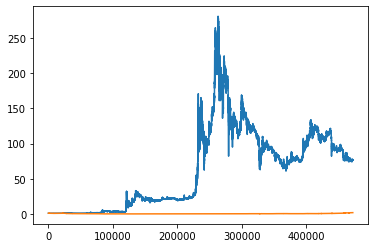

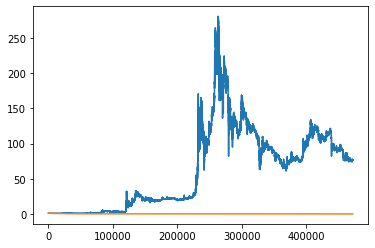

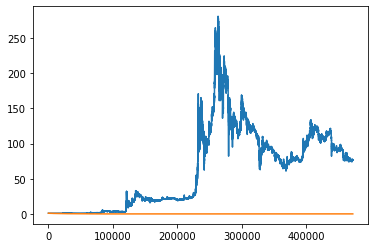

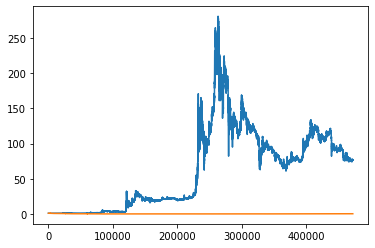

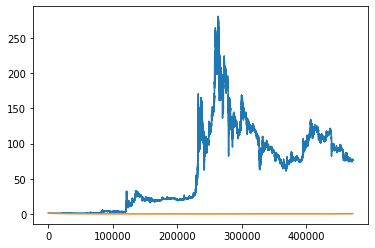

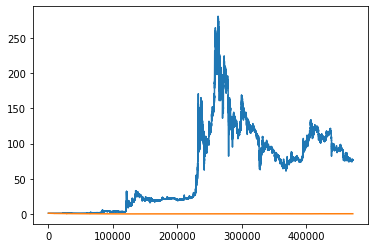

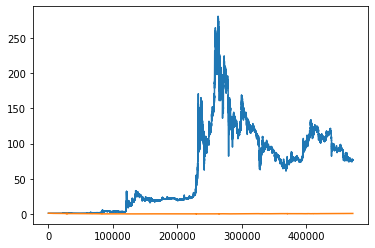

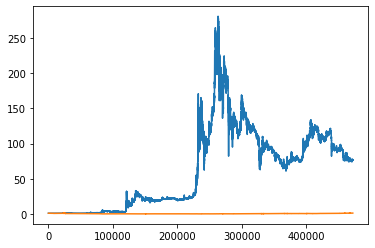

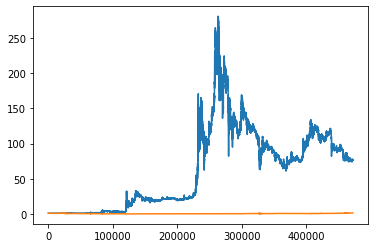

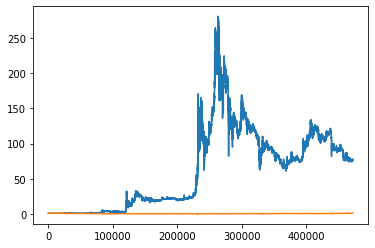

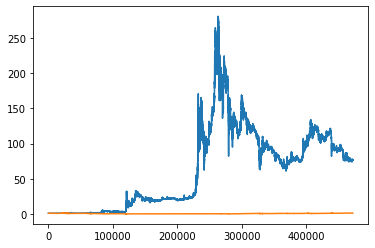

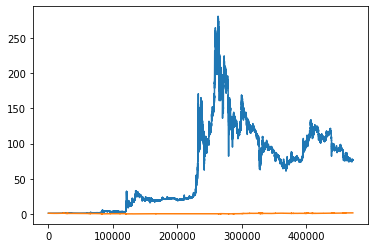

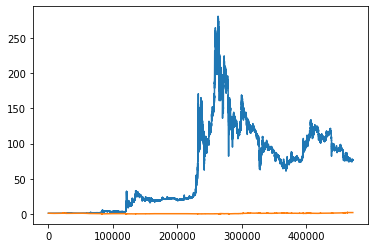

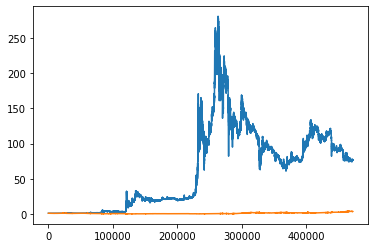

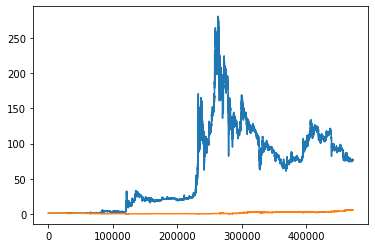

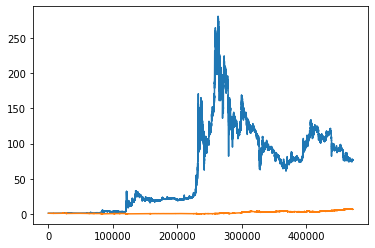

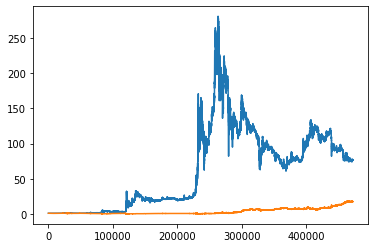

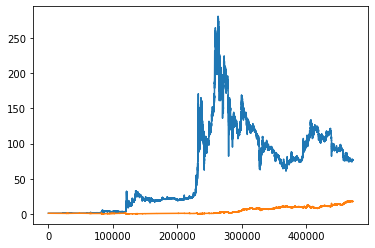

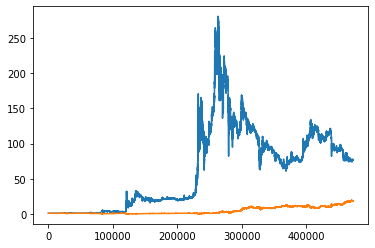

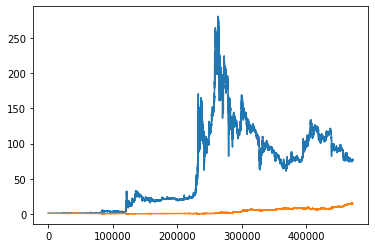

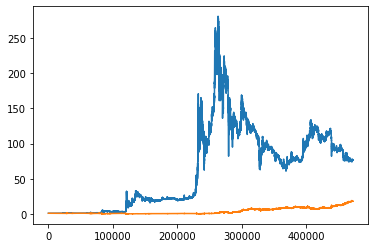

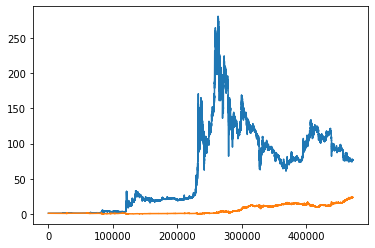

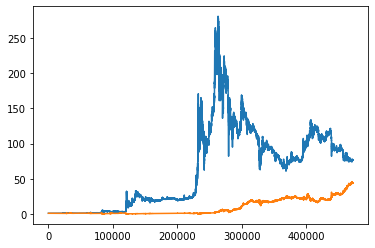

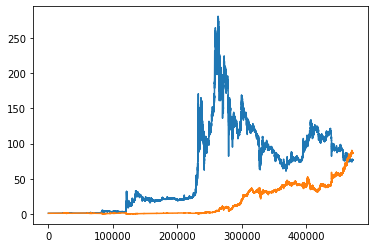

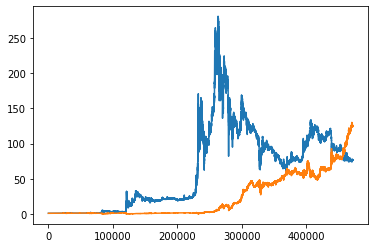

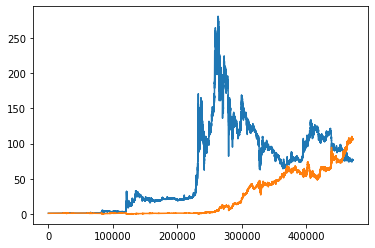

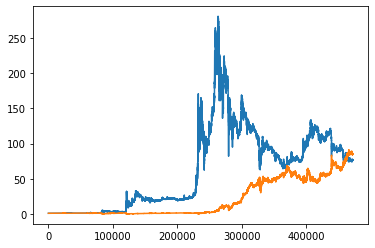

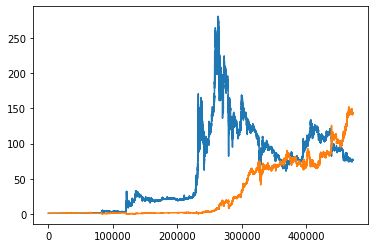

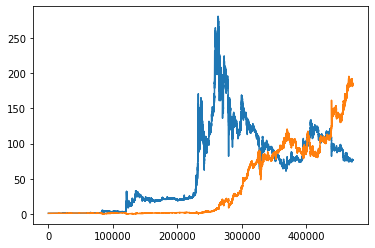

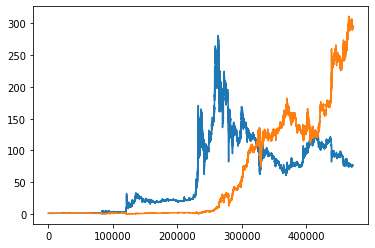

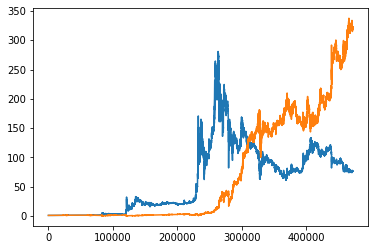

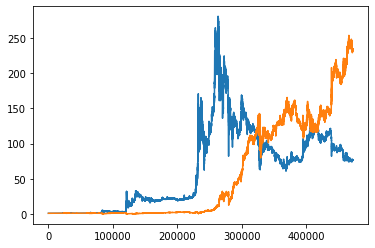

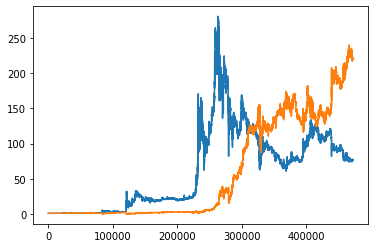

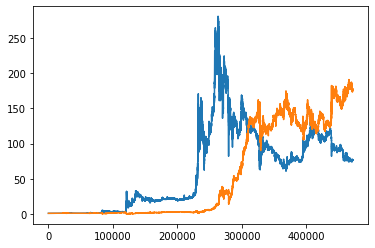

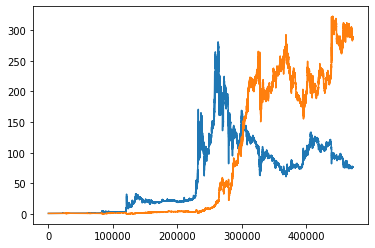

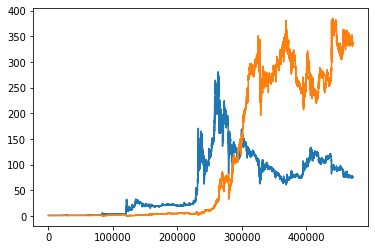

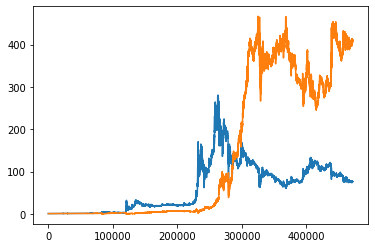

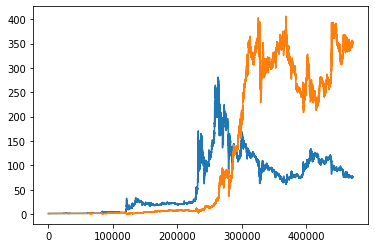

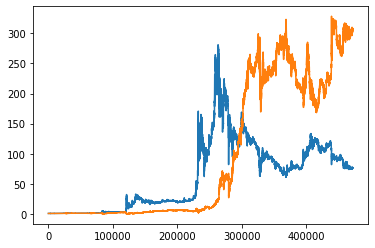

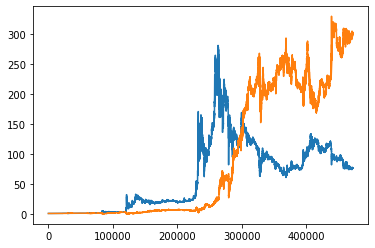

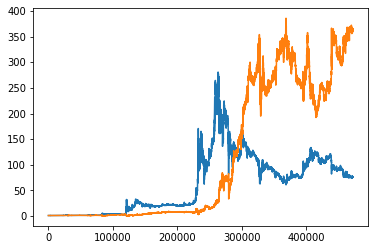

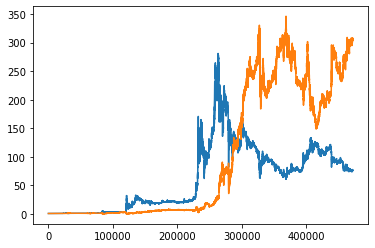

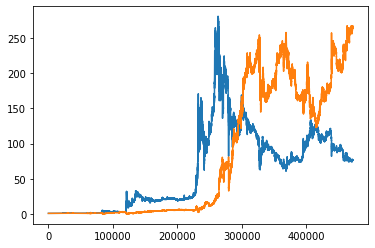

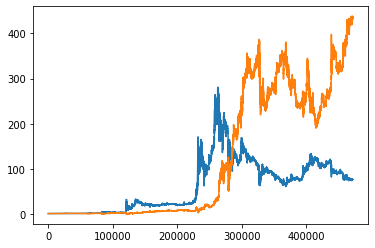

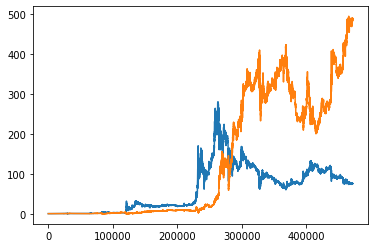

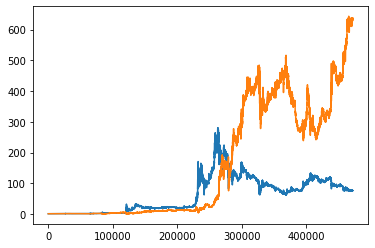

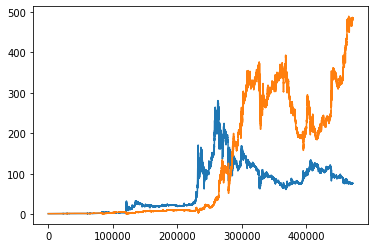

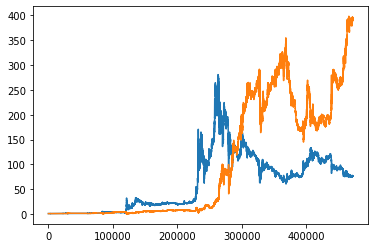

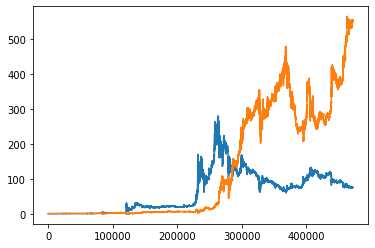

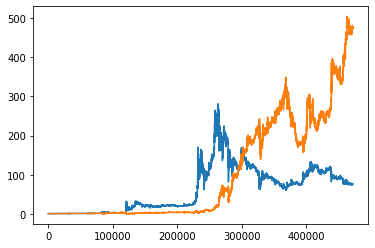

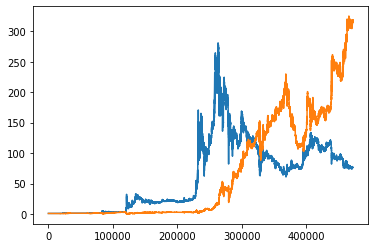

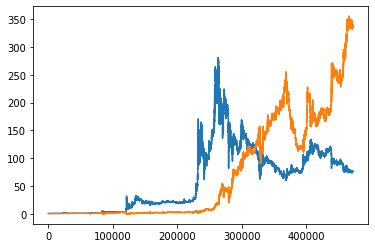

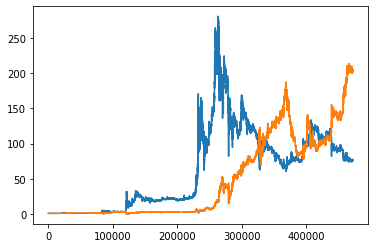

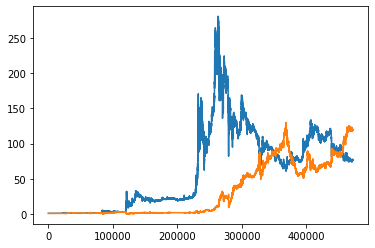

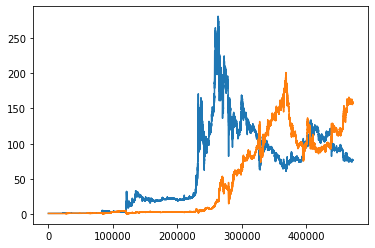

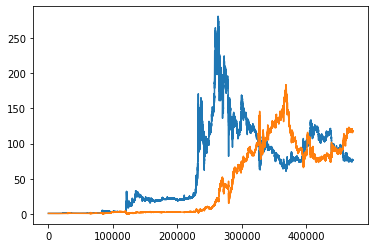

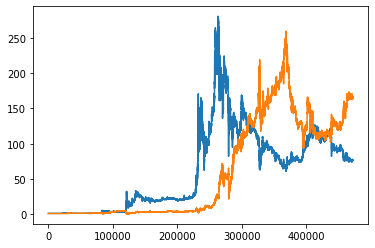

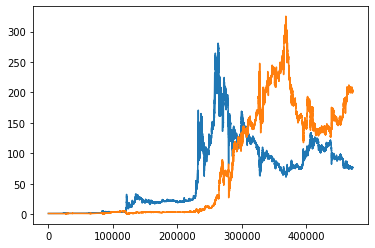

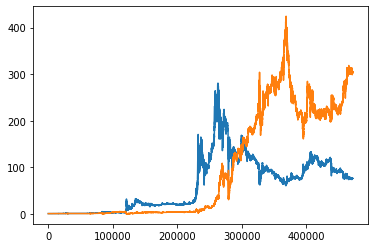

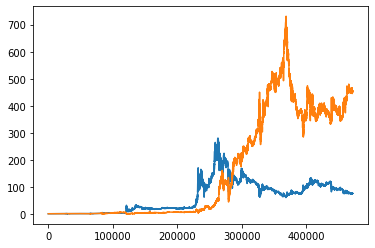

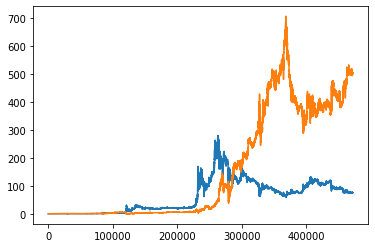

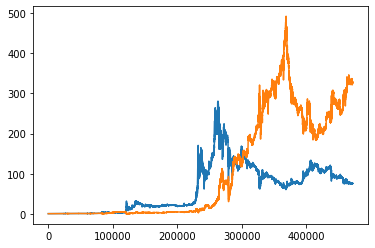

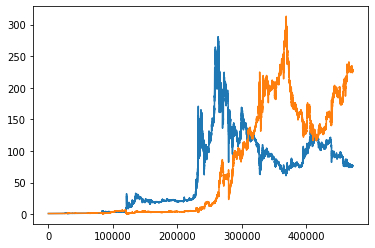

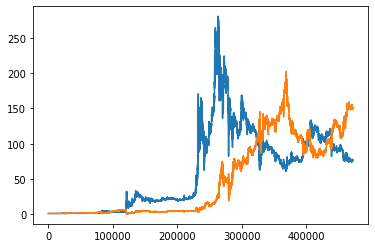

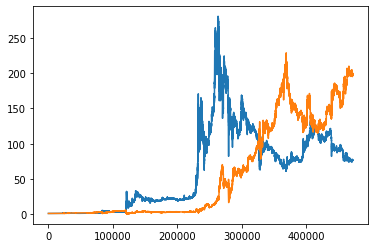

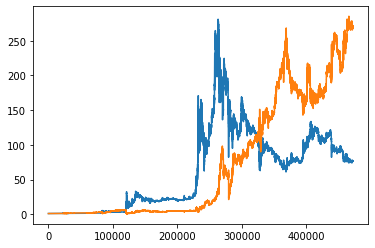

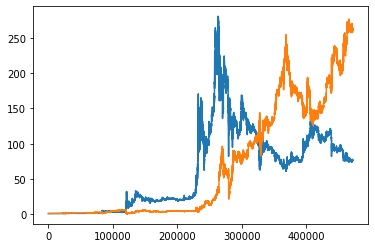

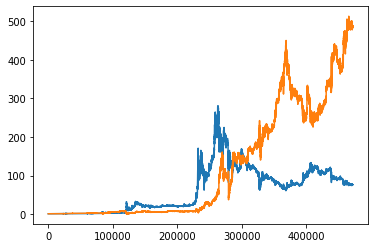

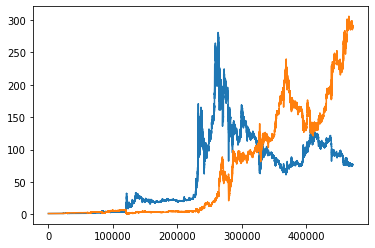

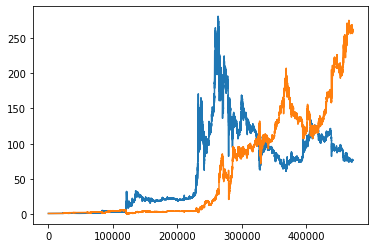

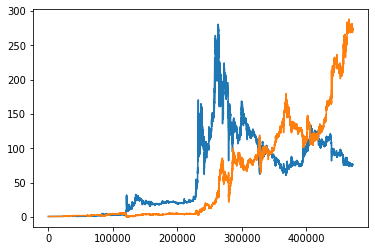

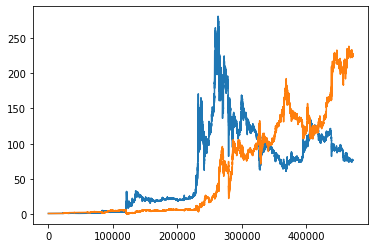

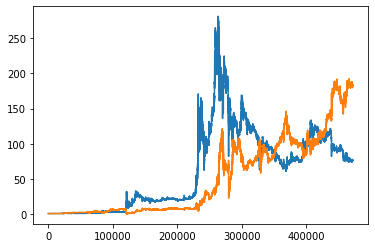

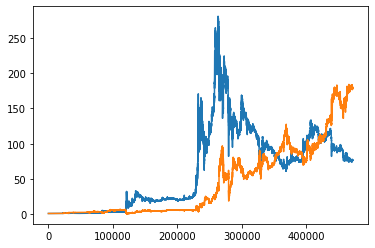

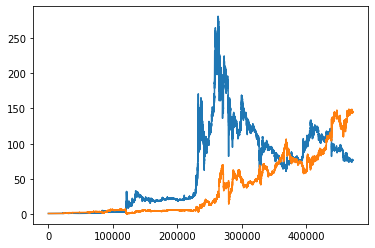

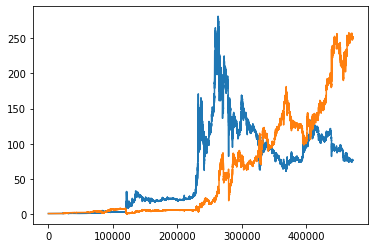

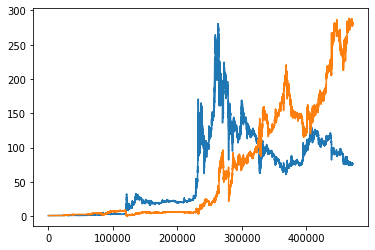

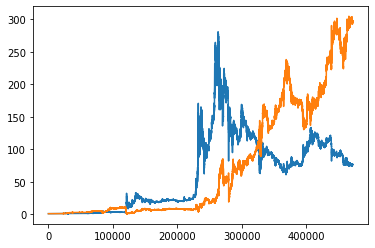

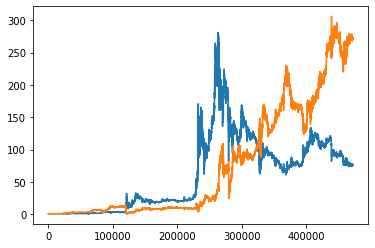

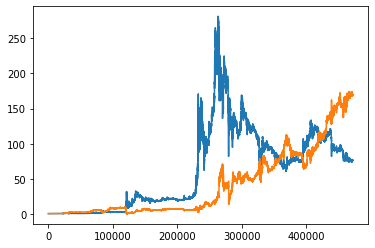

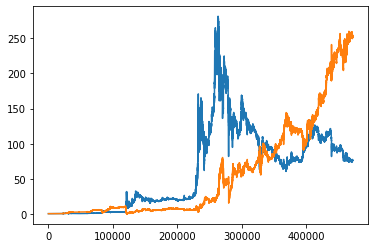

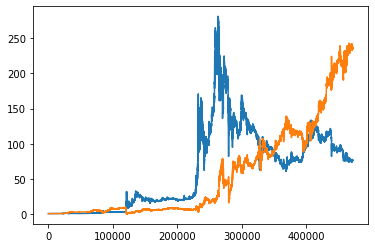

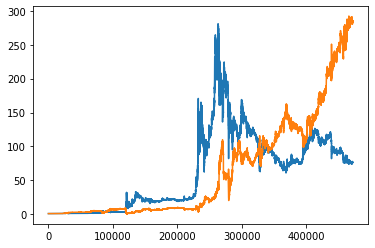

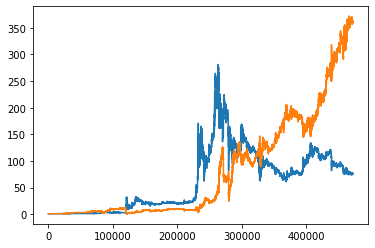

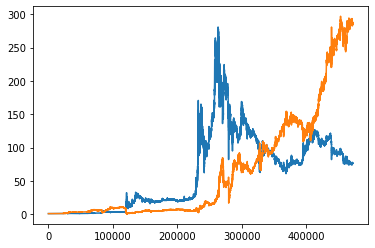

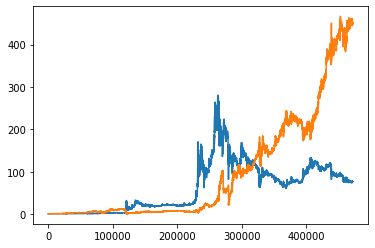

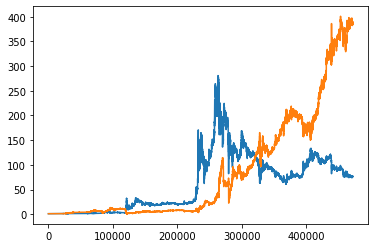

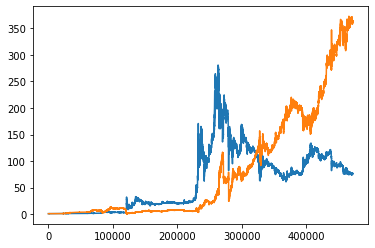

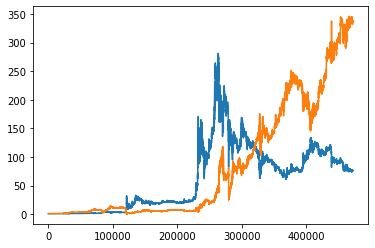

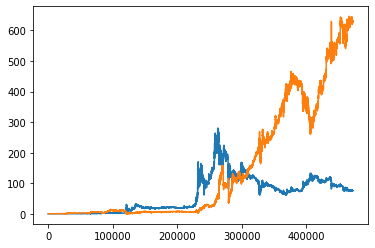

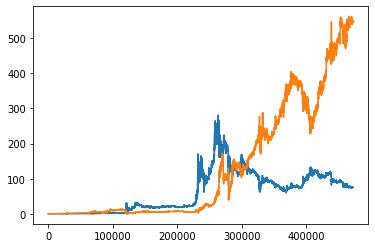

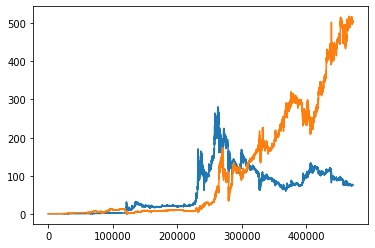

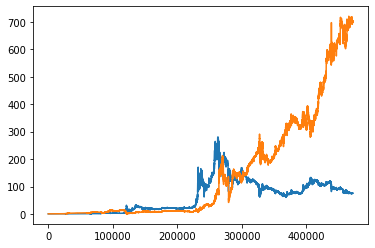

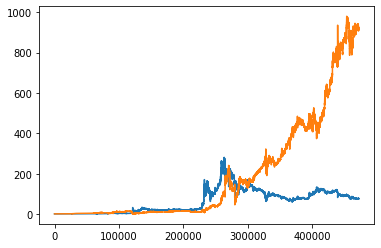

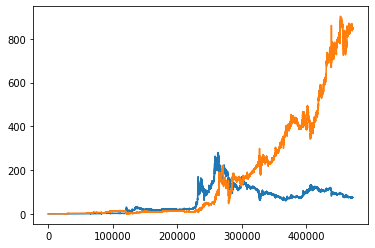

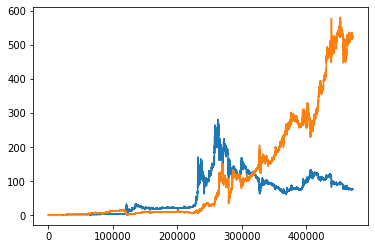

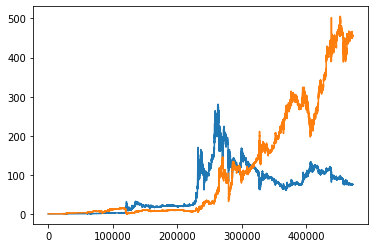

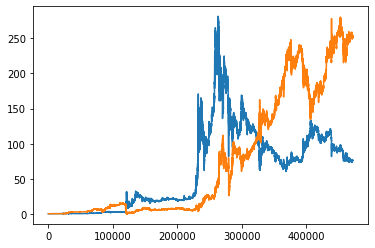

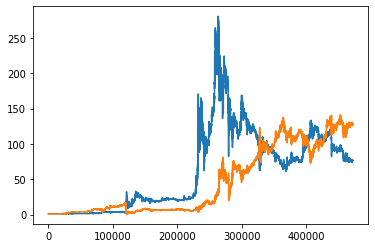

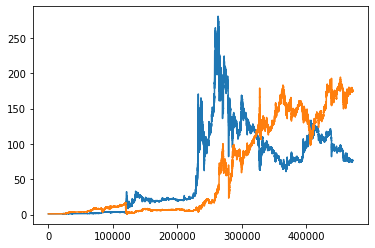

In [56]:
# limit_rate 최적화
yields = []
win_rates = []

margin_rate = 1
fee_rate = -0.01 / 100
threshold = [0,0]
mul_threshold = 1.0 / 100

for i in range(100):
    y_pred = y_preds[:,0]
    limit_rate = mul_threshold * i / 100
    trading_info, money_list, value_list = getYield(csv_data[data_start+start_diff:], y_pred)
    win_rates.append(trading_info[2])
    yields.append((money_list[-1]/money_list[0] - 1) * 100)

    plt.clf()
    plt.plot(list(range(len(value_list))), value_list/value_list[0])
    plt.plot(list(range(len(money_list))), money_list/money_list[0])
    plt.show()

In [57]:
max_idx = np.argmax(yields)
print("idx: %d, th: %.3f, yield: %.3f %%" % (max_idx, max_idx * mul_threshold, np.max(yields)))

idx: 93, th: 0.930, yield: 92132.816 %


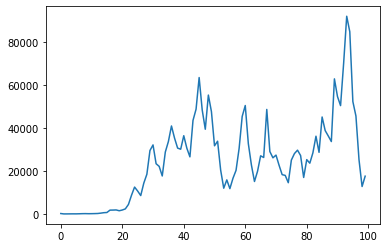

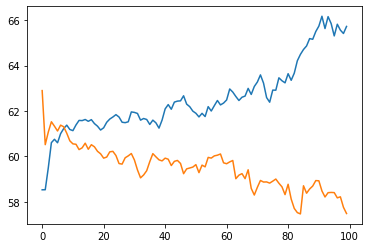

In [58]:
plt.clf()
plt.plot(list(range(len(yields))), yields)
plt.show()

plt.clf()
plt.plot(list(range(len(win_rates))), win_rates)
plt.show()

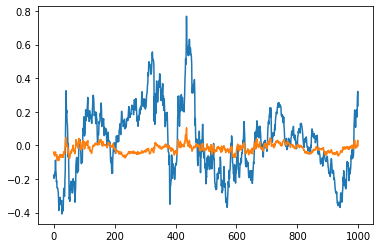

In [49]:
start = 0
period = 1000

plt.clf()
plt.plot(list(range(period)), y_data[start:start+period])
plt.plot(list(range(period)), y_pred[start:start+period])
plt.show()